# Transform data into another data frame

In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib as plt

data = pd.read_csv("train_3.txt",sep='\t')

In [2]:
#data.to_csv("train_3.txt",sep='\t',index=False)

In [3]:
data = data[['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS']]

In [4]:
groups = data.groupby(['DATE','ASS_ASSIGNMENT'])
import numpy as np

data_count = groups.aggregate(np.sum)
assignment = data_count.reset_index()

In [5]:
assignment.head()

DATE                  ASS_ASSIGNMENT  \
0  2011-01-01 00:00:00.000                          Crises   
1  2011-01-01 00:00:00.000                        Domicile   
2  2011-01-01 00:00:00.000                         Gestion   
3  2011-01-01 00:00:00.000  Gestion - Accueil Telephonique   
4  2011-01-01 00:00:00.000                    Gestion Amex   

   CSPL_RECEIVED_CALLS  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

Split the DATE to different columns and save the train data set with 6 columns:
year, month, day, time_slot(half an hour as a slot), weekday, calls

In [6]:
from datetime import datetime

df = assignment
df = df.sort(columns=['DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['time'] = df['DATE'].dt.hour*2 + df['DATE'].dt.minute/30
df['weekday'] = [df['DATE'][i].weekday()+1 for i in range(len(df))]
df = df[['year','month','day','time','weekday','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS']]

df.to_csv("train_7.txt",sep='\t',index=False)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [9]:
df.head(10)

year  month  day  time  weekday       ASS_ASSIGNMENT  CSPL_RECEIVED_CALLS
0   2011      1    1   0.0        6               Crises                    0
18  2011      1    1   0.0        6           Téléphonie                    0
17  2011      1    1   0.0        6          Tech. Inter                    0
16  2011      1    1   0.0        6            Tech. Axa                    0
15  2011      1    1   0.0        6             Services                    0
14  2011      1    1   0.0        6                  SAP                    0
12  2011      1    1   0.0        6              RENAULT                    0
11  2011      1    1   0.0        6                 Nuit                   12
10  2011      1    1   0.0        6              Médical                    0
13  2011      1    1   0.0        6  Regulation Medicale                    0

# Group data analysis for three years by ASS_ASSIGNMENT
## Exemple: Evenements
### Note: you can change the group name here to view others

   month      index    year   day    time  weekday  CSPL_RECEIVED_CALLS
0      3   20319739  116678  1509  1732.0      294                 4365
1      4  121230775  480896   957  5983.0     1547                36647
2      5    1697767    4026    14    65.0        4                    0
3      7     985005   10055    58    79.0       22                    0
4      8     852417    4023    38    76.0       12                    0
5      9    5664779   18108   240   250.0       30                   18
6     10  221778366  690116  4610  8858.0     2129                 8181
7     11     704090    2012    15    25.0        4                    0
8     12    2194361    6036    36    98.0        9                    1


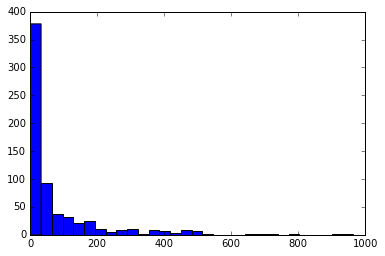

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month                         10.0
index                  221778366.0
year                      690116.0
day                         4610.0
time                        8858.0
weekday                     2129.0
CSPL_RECEIVED_CALLS         8181.0
Name: 6, dtype: float64
[  0.00000000e+00   0.00000000e+00   4.36500000e+03   3.66470000e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.80000000e+01   8.18100000e+03   0.00000000e+00   1.00000000e+00]


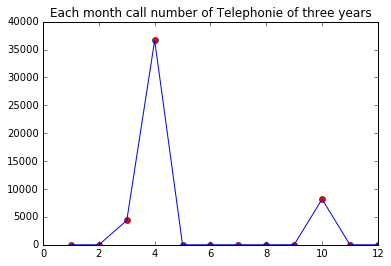

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("train_7.txt",sep='\t')

ass = df.groupby('ASS_ASSIGNMENT')
months = ass.get_group('Evenements')
months = months.reset_index()
months = months.groupby('month').aggregate(np.sum).reset_index()
print months

plt.hist(ass.get_group('Evenements').CSPL_RECEIVED_CALLS,bins=30)
plt.show()

plt.figure()
calls = np.zeros(12,)
print range(1,13)
print months.loc[6]
calls[months.month-1] = months.CSPL_RECEIVED_CALLS
print calls
plt.plot(range(1,13),calls,'ro', range(1,13),calls)
plt.title('Each month call number of Telephonie of three years')

In [54]:
telephonie = ass.get_group('Téléphonie')
v1000 = telephonie[telephonie.CSPL_RECEIVED_CALLS>1000].CSPL_RECEIVED_CALLS
print len(v1000)

169


# Call number statistics for all three years by ASS_ASSIGNMENT

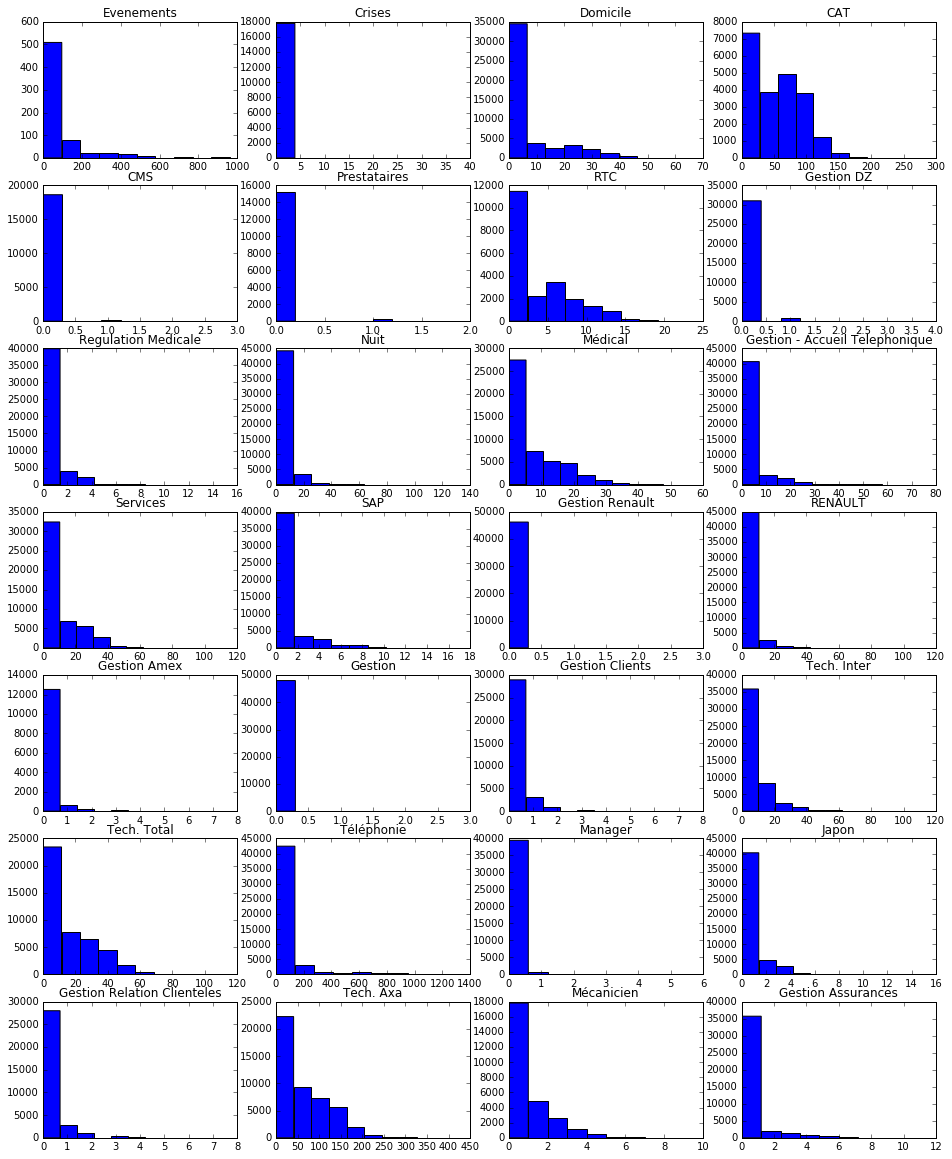

In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_7.txt",sep='\t')
ass = df.groupby('ASS_ASSIGNMENT')

i = 0
plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(7, 4)
for gr in ass.groups:
    cp = ass.get_group(gr)
    ax = plt.subplot(gs[i/4,i%4])
    ax.hist(cp.CSPL_RECEIVED_CALLS,bins=10)
    ax.set_title(gr.decode(encoding='utf-8'))
    #ax.set_xlabel('call number each slot')
    #ax.set_ylabel('Frequency of call number for each slot')
    i+=1
plt.show()

# Call number statistics for each months by ASS_ASSIGNMENT

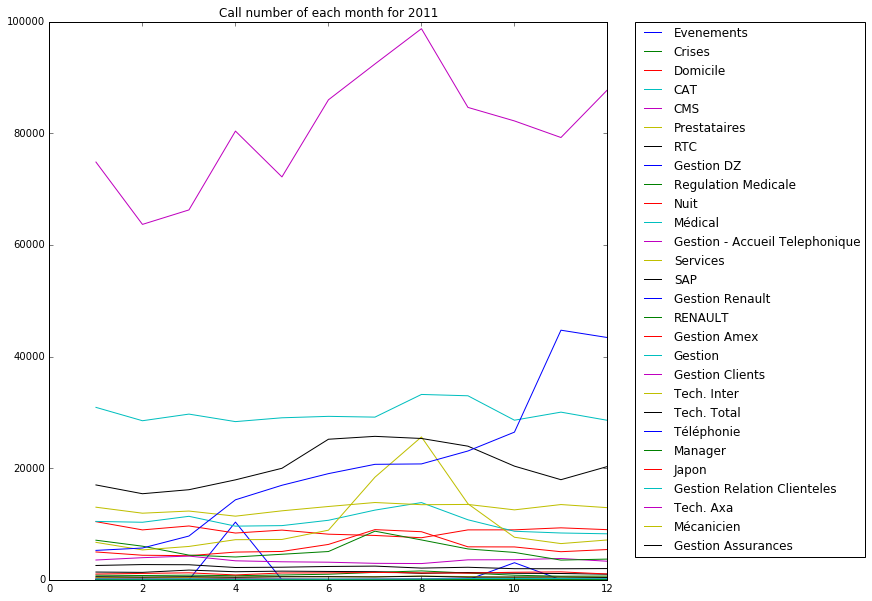

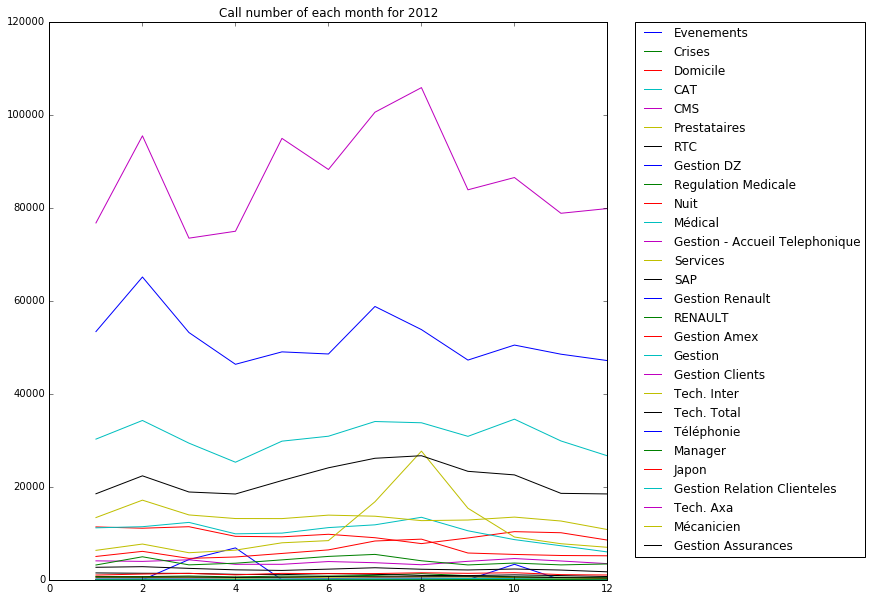

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


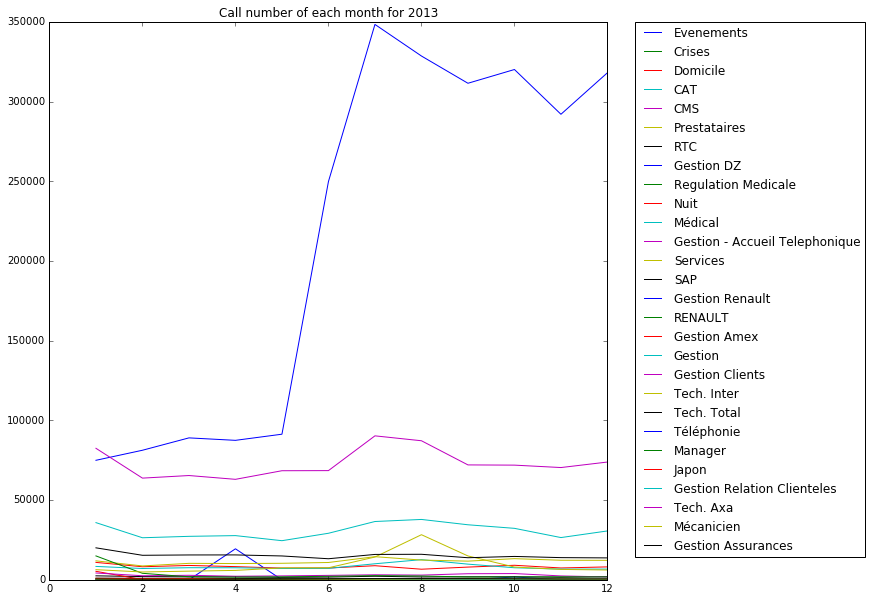

In [150]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_7.txt",sep='\t')
ass = df.groupby('ASS_ASSIGNMENT')


gs = gridspec.GridSpec(7, 4)
for j in range(3):
    plt.figure(figsize=(10,10))
    handles = []
    ass_name = []
    k = 0
    for gr in ass.groups:
        #print gr
        ass_name.append(gr.decode(encoding='utf-8'))
        months = ass.get_group(gr)
        months = months[months['year']==(2011+j)].groupby('month')
        months = months.aggregate(np.sum).reset_index()
        calls = np.zeros(12,)
        calls[months.month-1] = months.CSPL_RECEIVED_CALLS
         
        handle, = plt.plot(range(1,13),calls)
        handles.append(handle)
        plt.title('Call number of each month '+'for '+str(2011+j))
        #ax.set_xlabel('call number each slot')
        #ax.set_ylabel('Frequency of call number for each slot')
        i+=1
    plt.legend(handles,ass_name,bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

# Month stastics by group for each year

2011 year


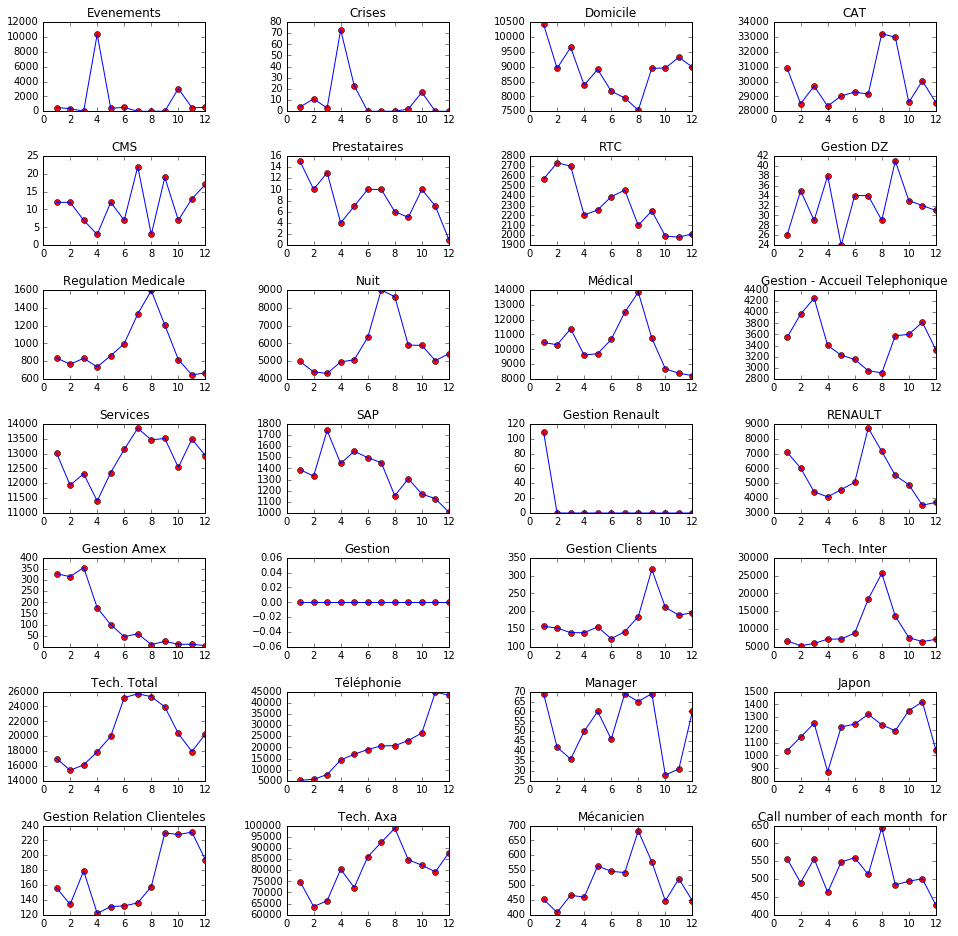

2012 year


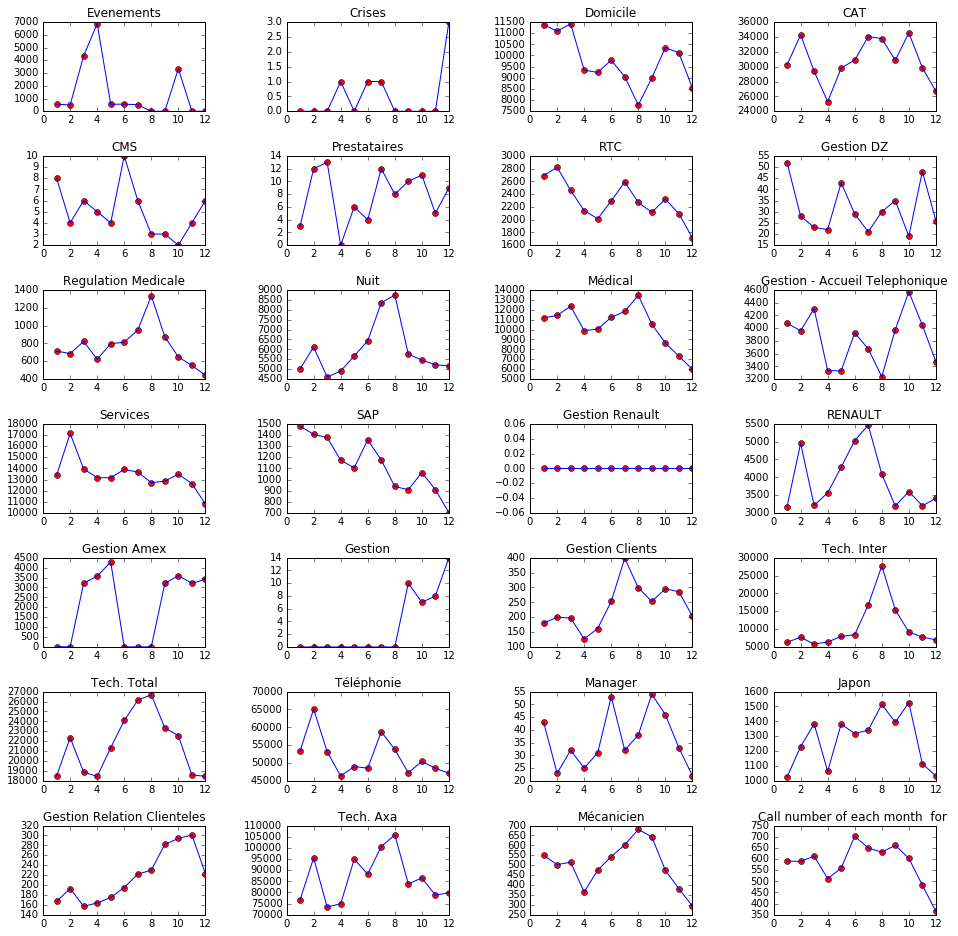

2013 year


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


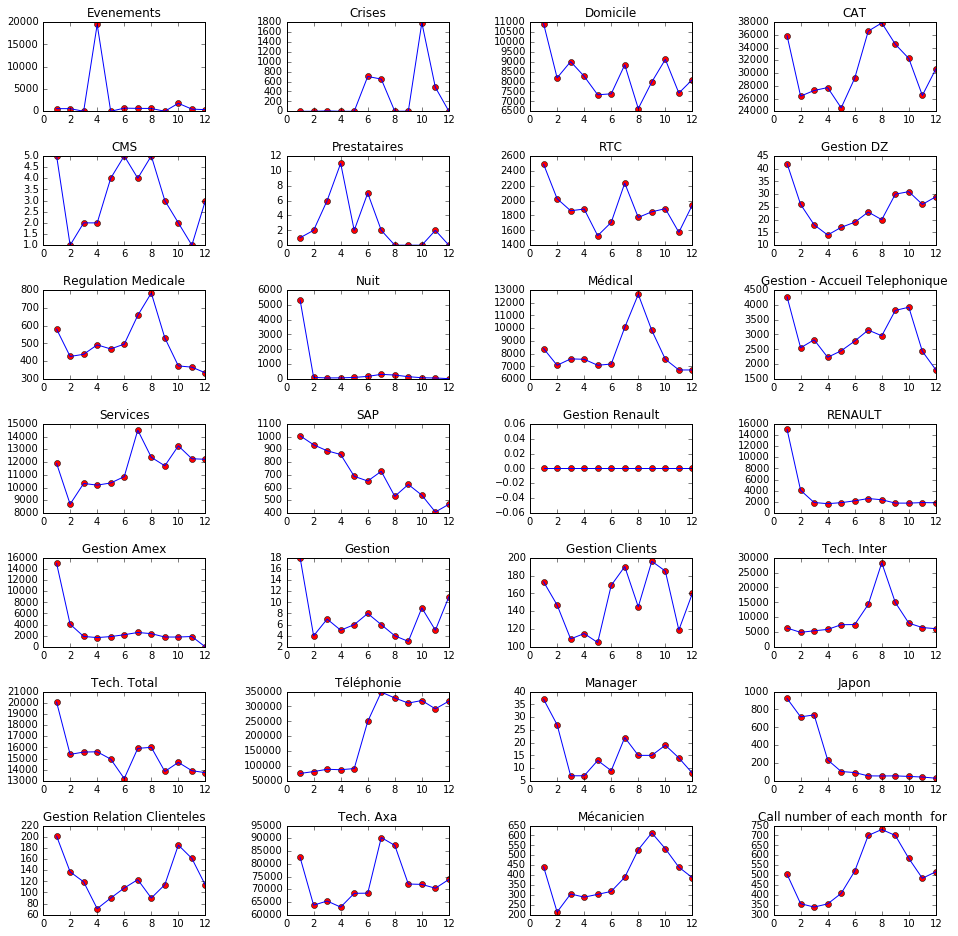

In [49]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_7.txt",sep='\t')
ass = df.groupby('ASS_ASSIGNMENT')


#plt.figure(figsize=(16, 20))

for j in range(3):
    print 2011+j, "year"
    fig = plt.figure(figsize=(16,16))
    gs = gridspec.GridSpec(7, 4,wspace=0.5,hspace=0.5)
    ass_name = []
    year = 2011+j
    k = 0
    for gr in ass.groups:
        #print gr
        ass_name.append(gr.decode(encoding='utf-8'))
        months = ass.get_group(gr)
        months = months[months['year']==(2011+j)].groupby('month')
        months = months.aggregate(np.sum).reset_index()
        calls[months.month-1] = months.CSPL_RECEIVED_CALLS
        ax = plt.subplot(gs[k/4,k%4])
        ax.plot(range(1,13),calls,'ro',range(1,13),calls)
        
        ax.set_title(gr.decode(encoding='utf-8'))
        #ax.set_xlabel('call number each slot')
        #ax.set_ylabel('Frequency of call number for each slot')
        k+=1
    plt.title("Call number of each month "+" for ")
    plt.show()

## Calls number for each month of three years

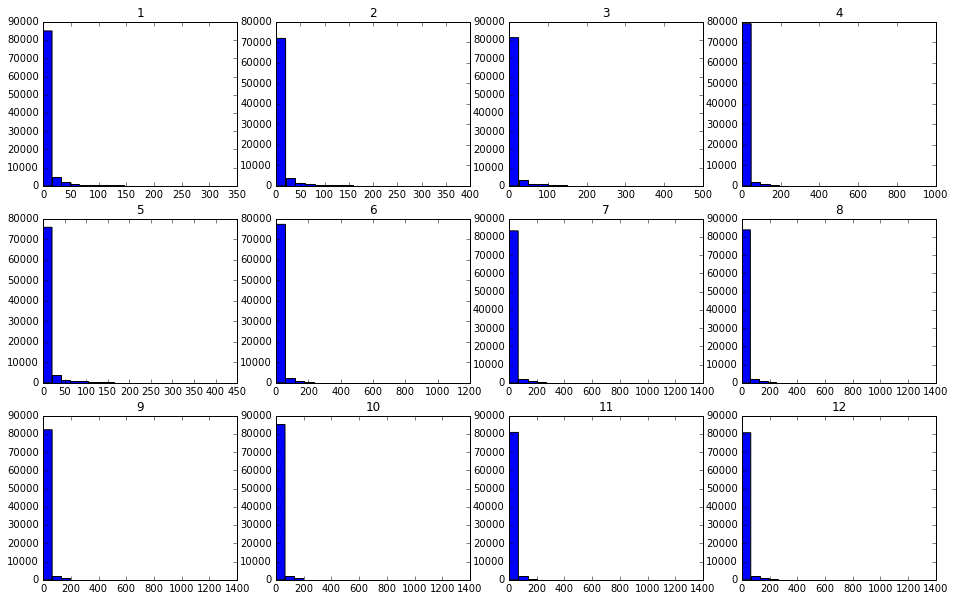

In [11]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_7.txt",sep='\t')
months = df.groupby('month')
i = 0
plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 4)
for gr in months.groups:
    cp = months.get_group(gr)
    ax = plt.subplot(gs[i/4,i%4])
    ax.hist(cp.CSPL_RECEIVED_CALLS,bins=20)
    ax.set_title(gr)
    #ax.set_xlabel('call number each slot')
    #ax.set_ylabel('Frequency of call number for each slot')
    i+=1

plt.show()

## Calls number of different years

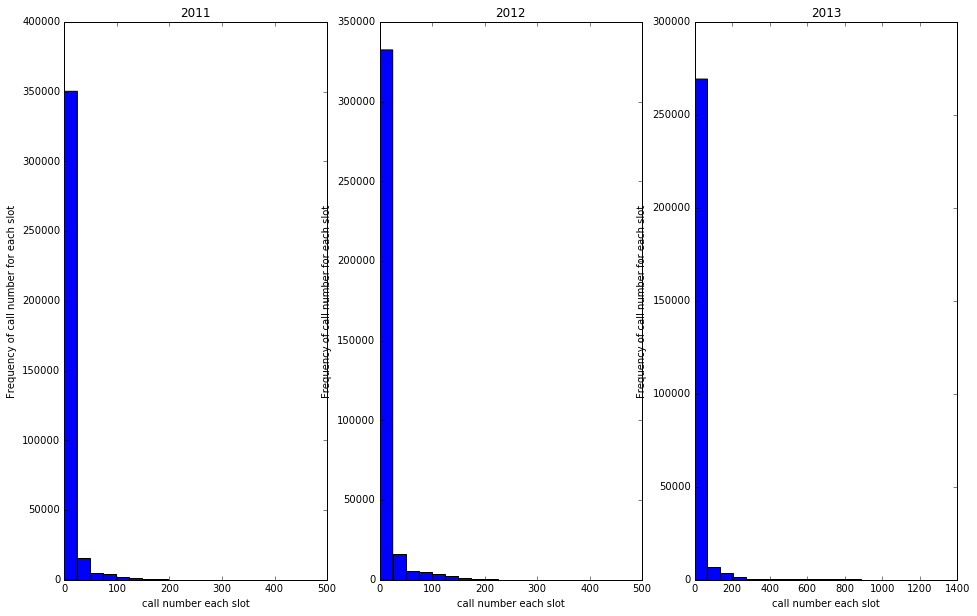

In [15]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_7.txt",sep='\t')
years = df.groupby('year')
i = 0
plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(1, 3)
for gr in years.groups:
    cp = years.get_group(gr)
    ax = plt.subplot(gs[0,i%3])
    ax.hist(cp.CSPL_RECEIVED_CALLS,bins=20)
    ax.set_title(gr)
    ax.set_xlabel('call number each slot')
    ax.set_ylabel('Frequency of call number for each slot')
    i+=1

plt.show()

# Call numbers for each slot by group for each year

Evenements


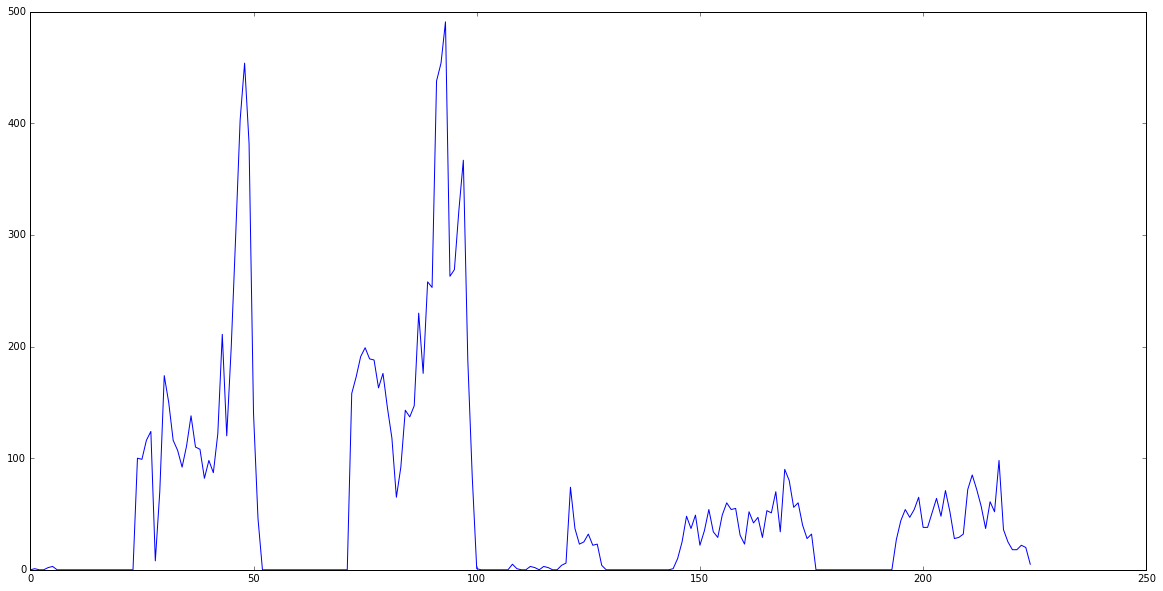

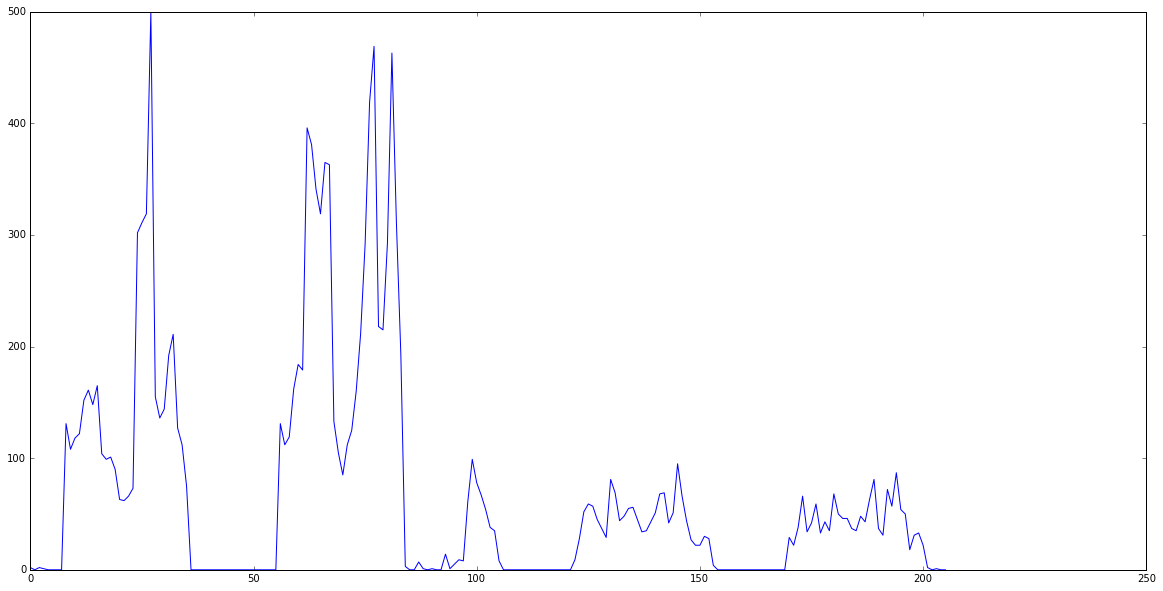

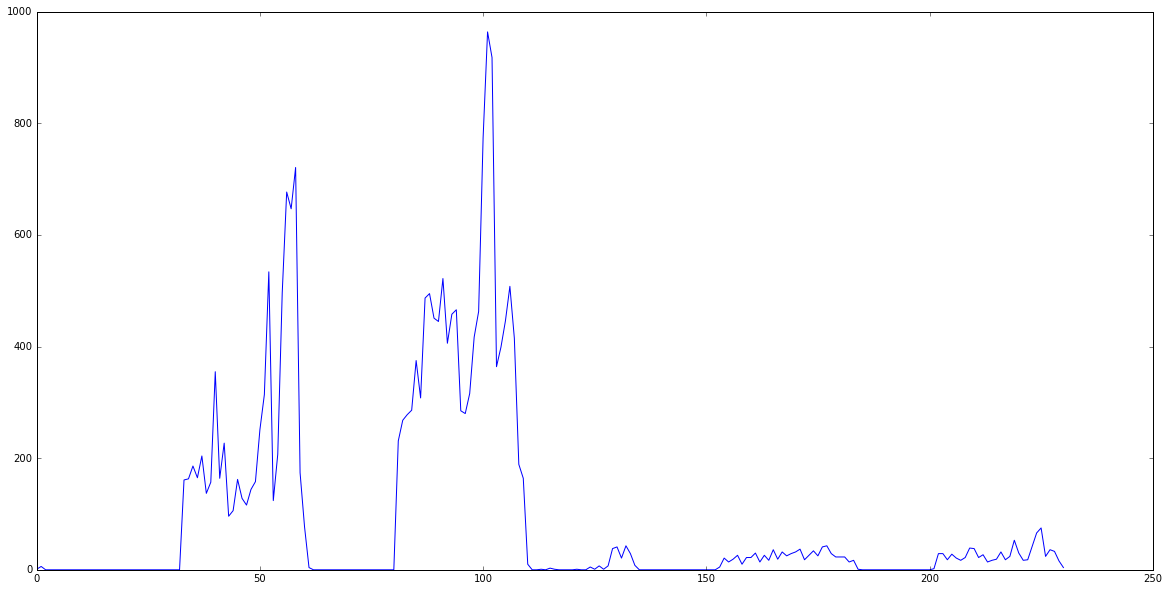

Crises


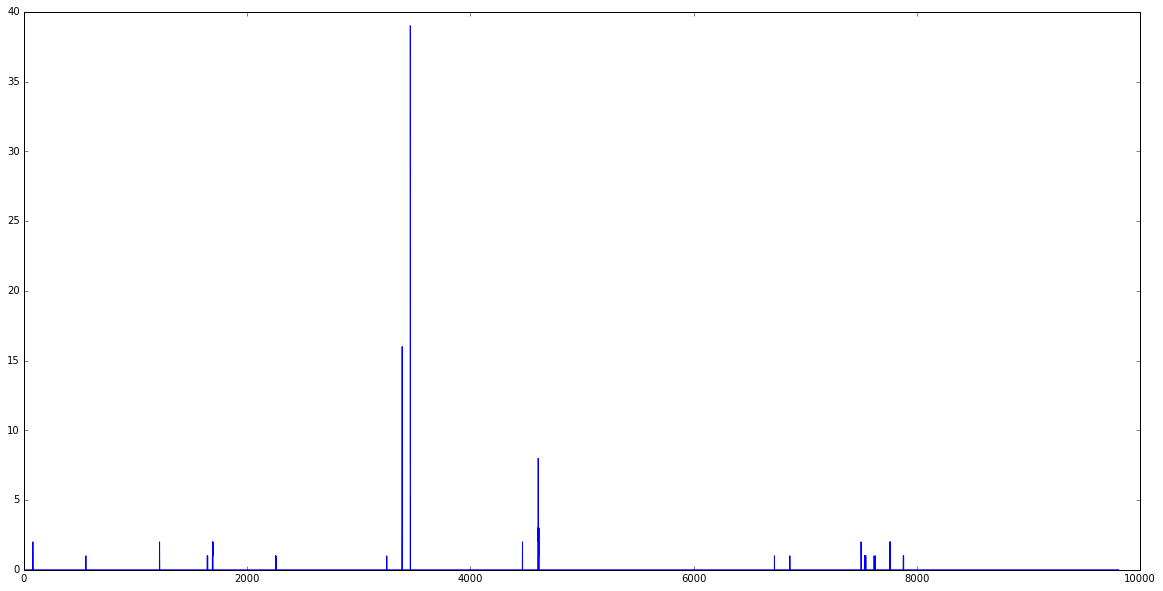

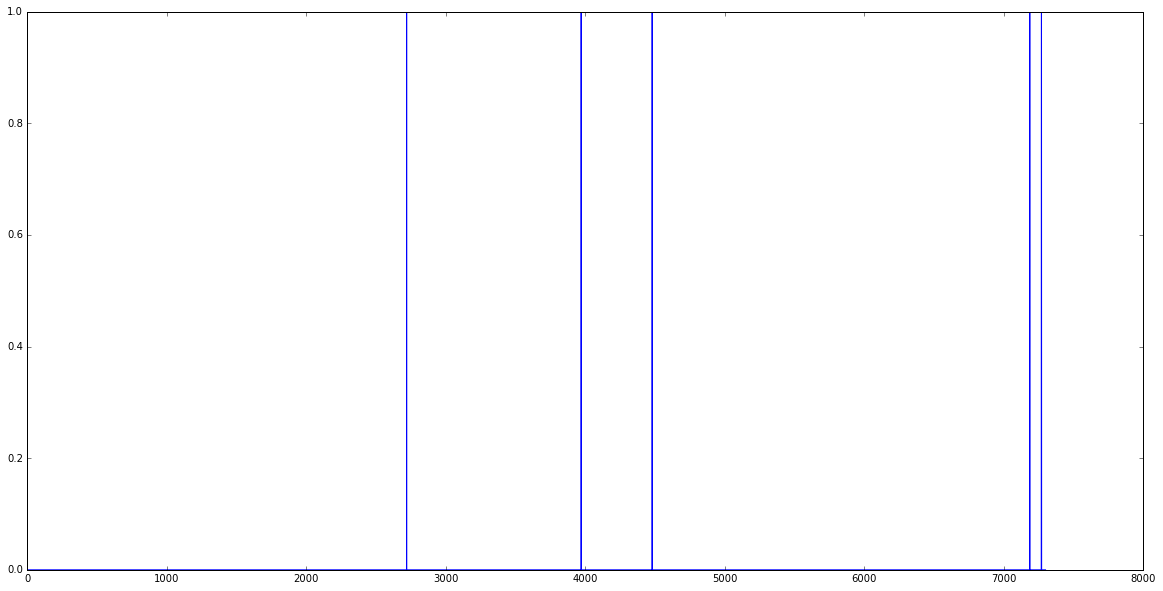

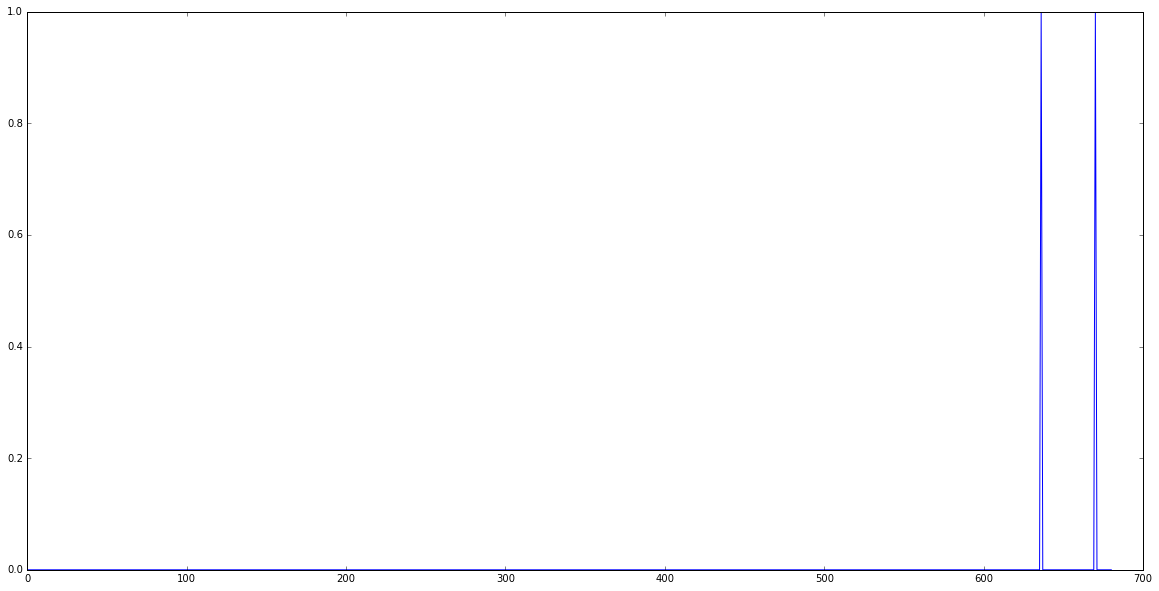

Domicile


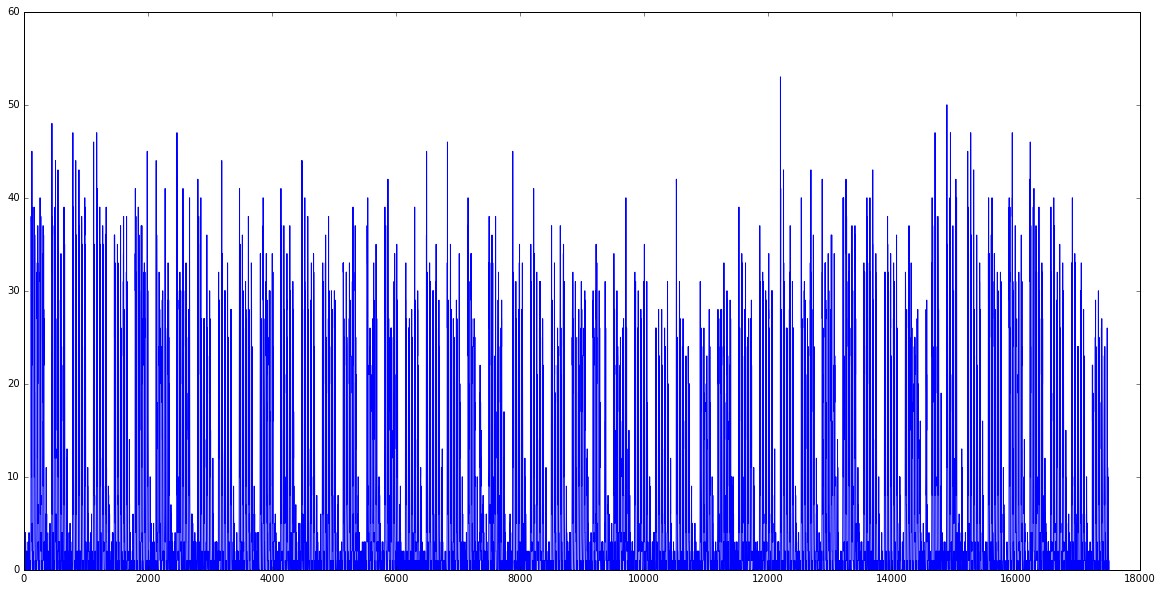

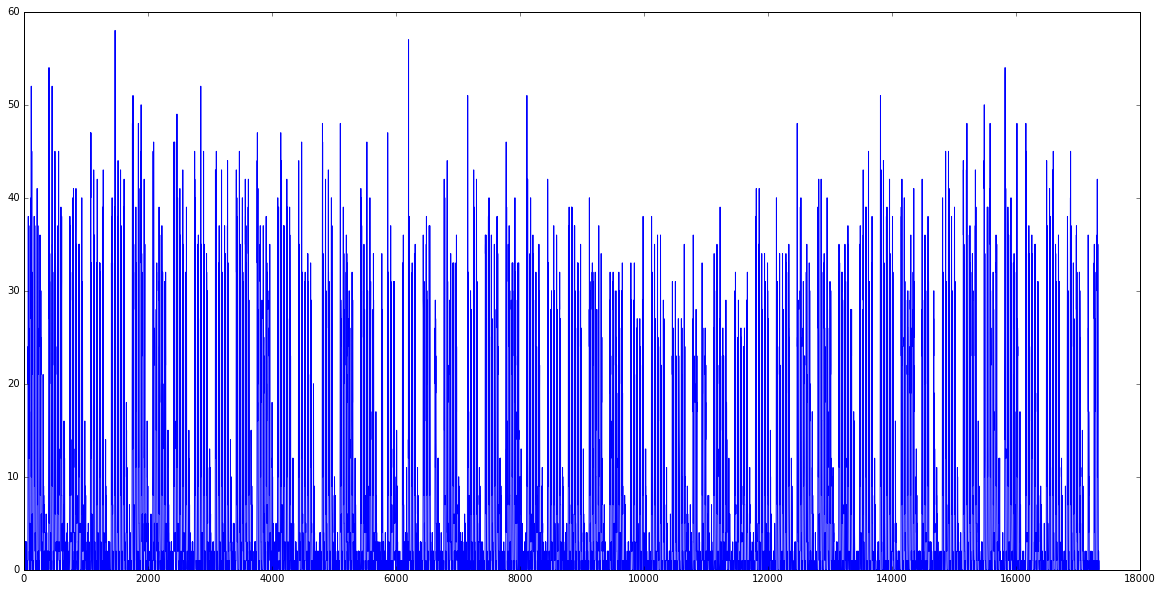

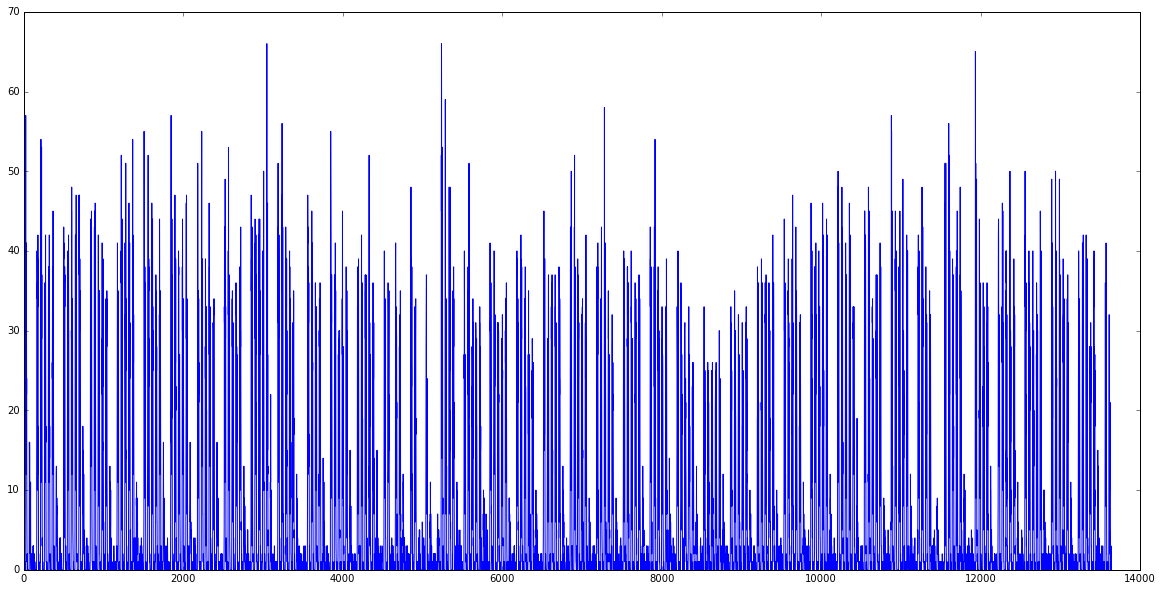

CAT


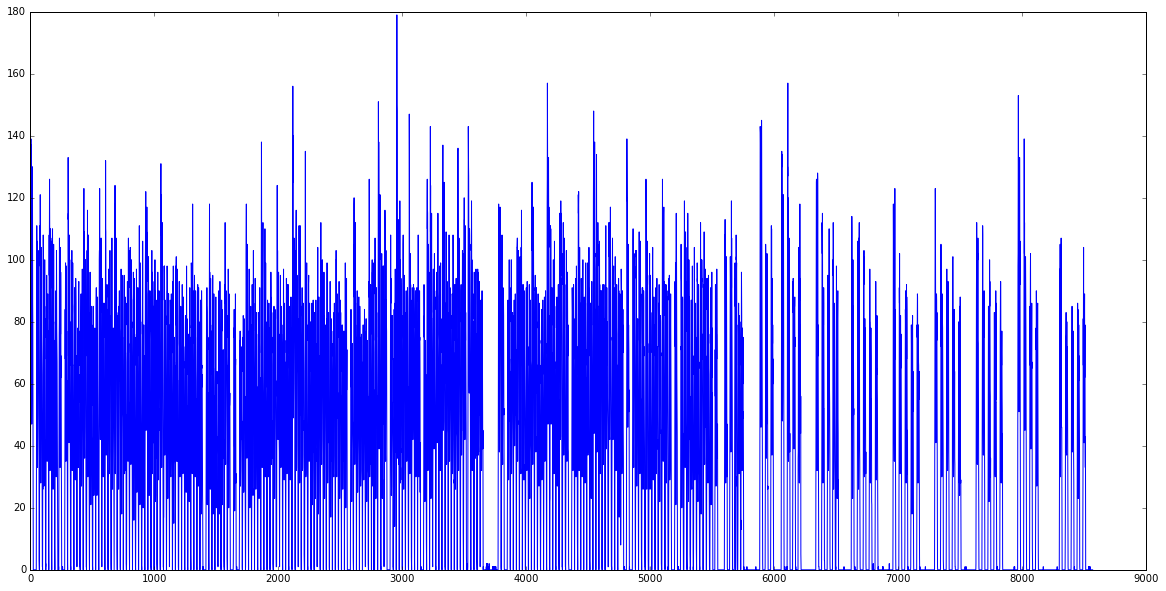

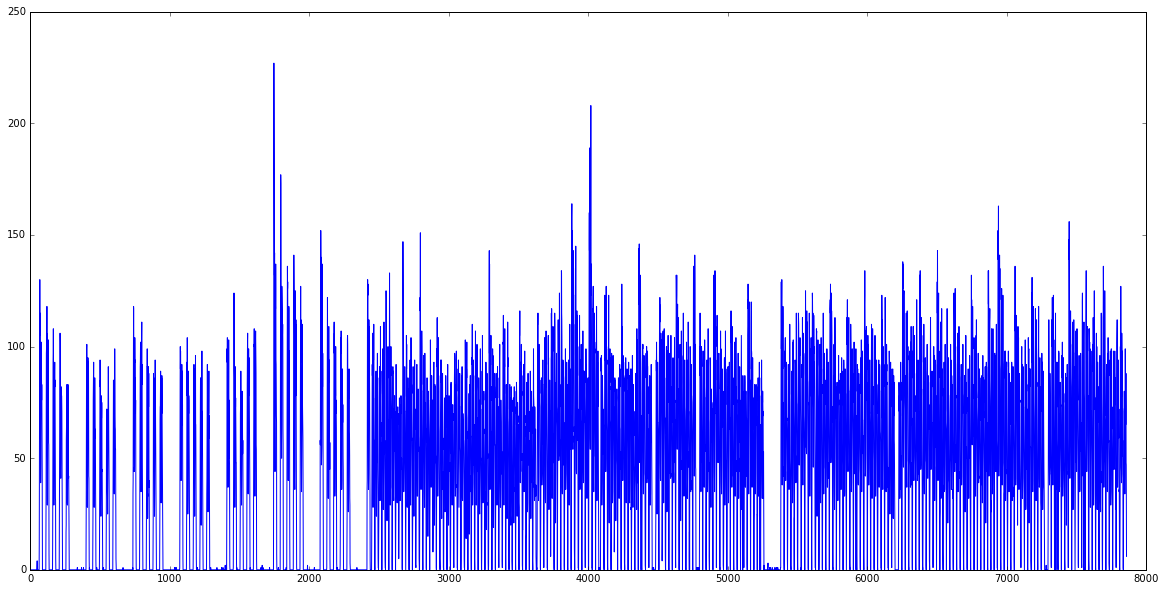

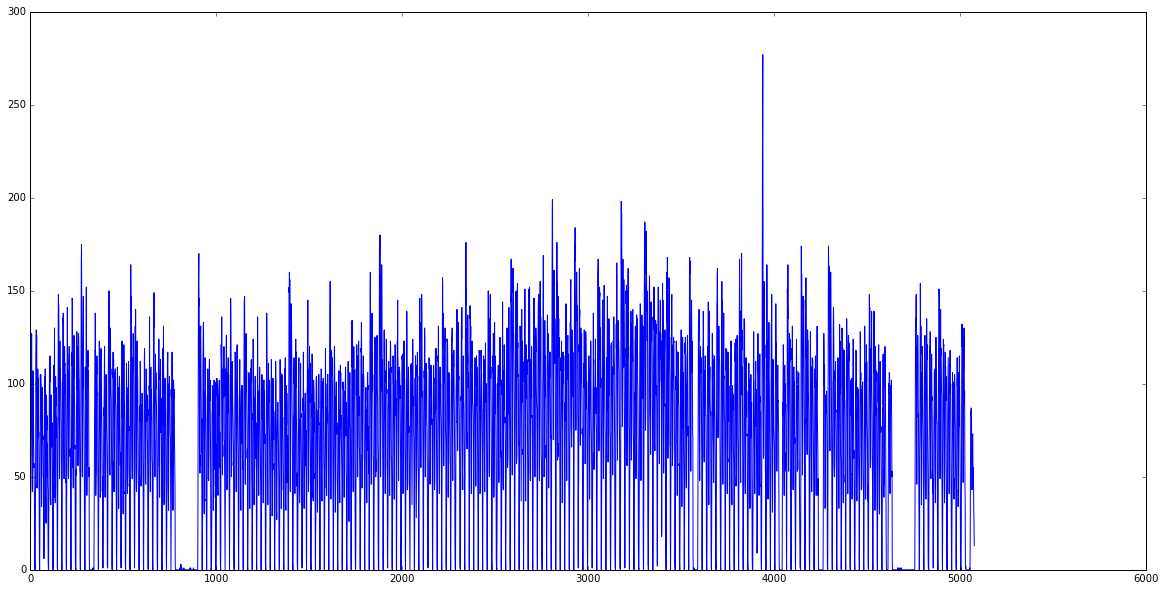

CMS


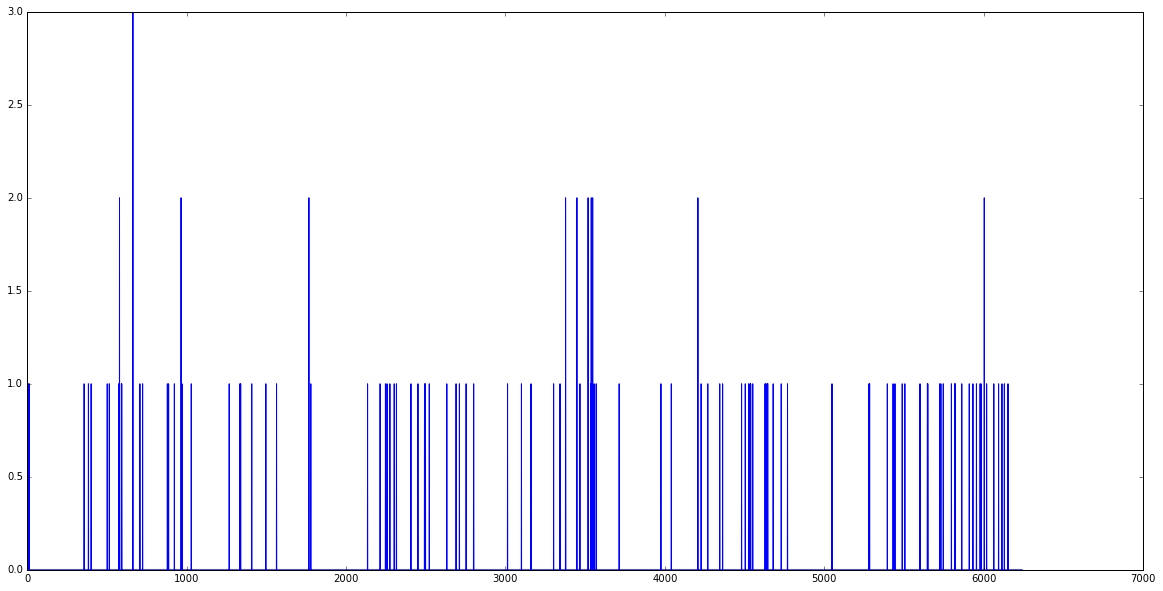

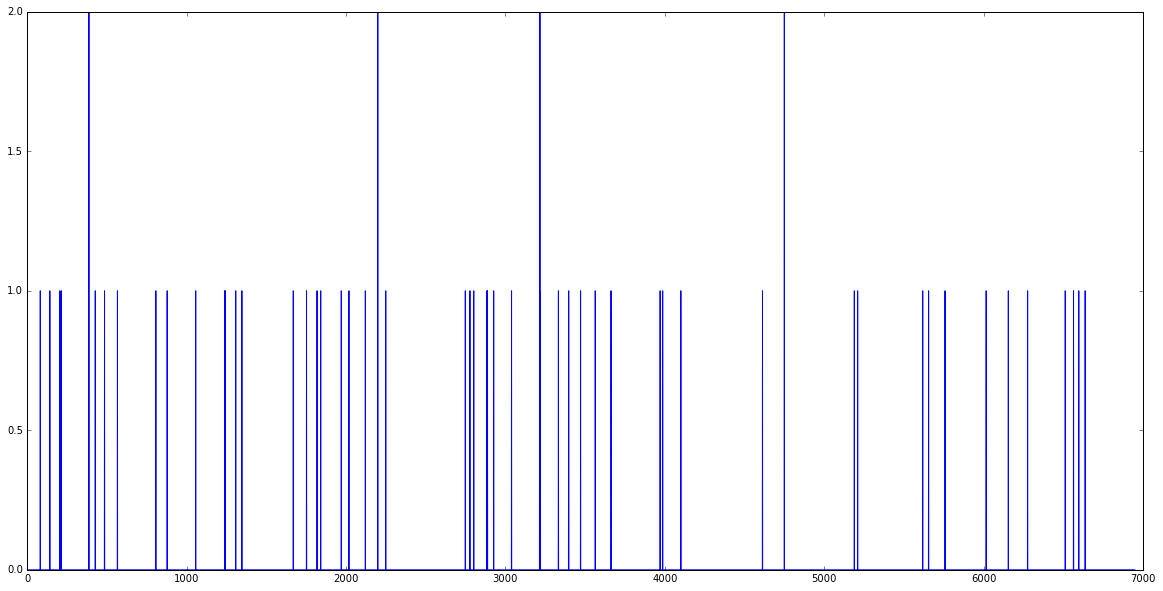

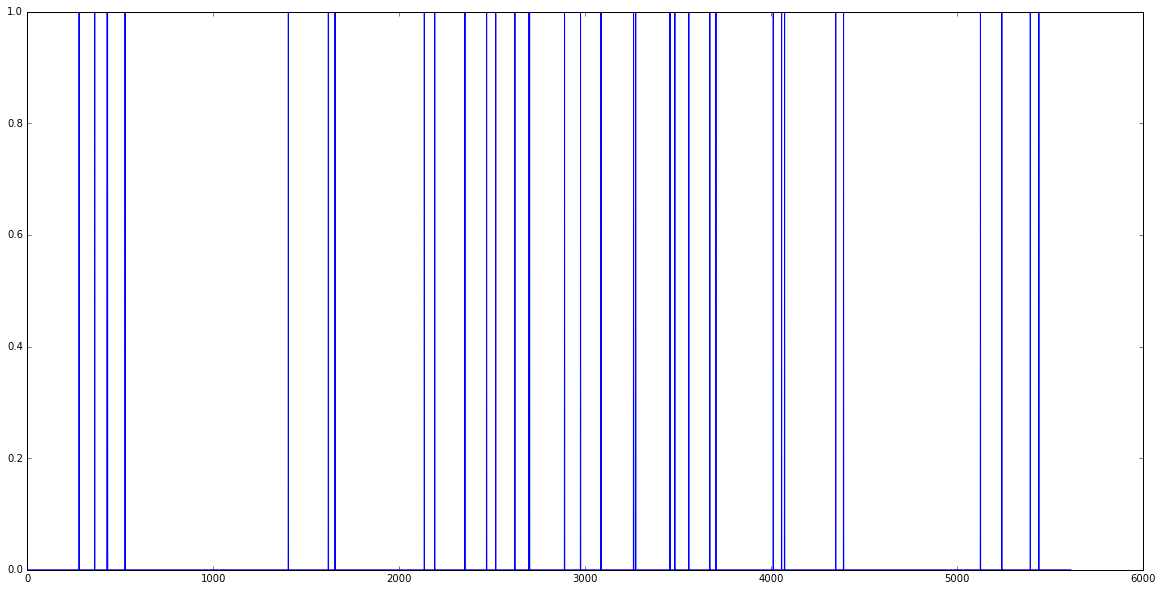

Prestataires


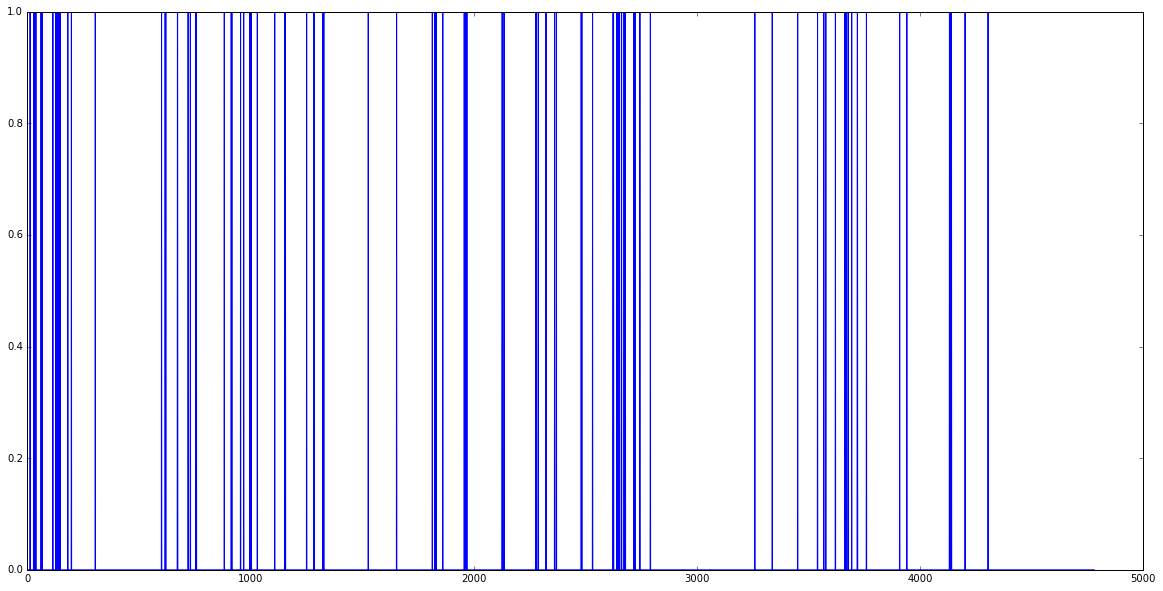

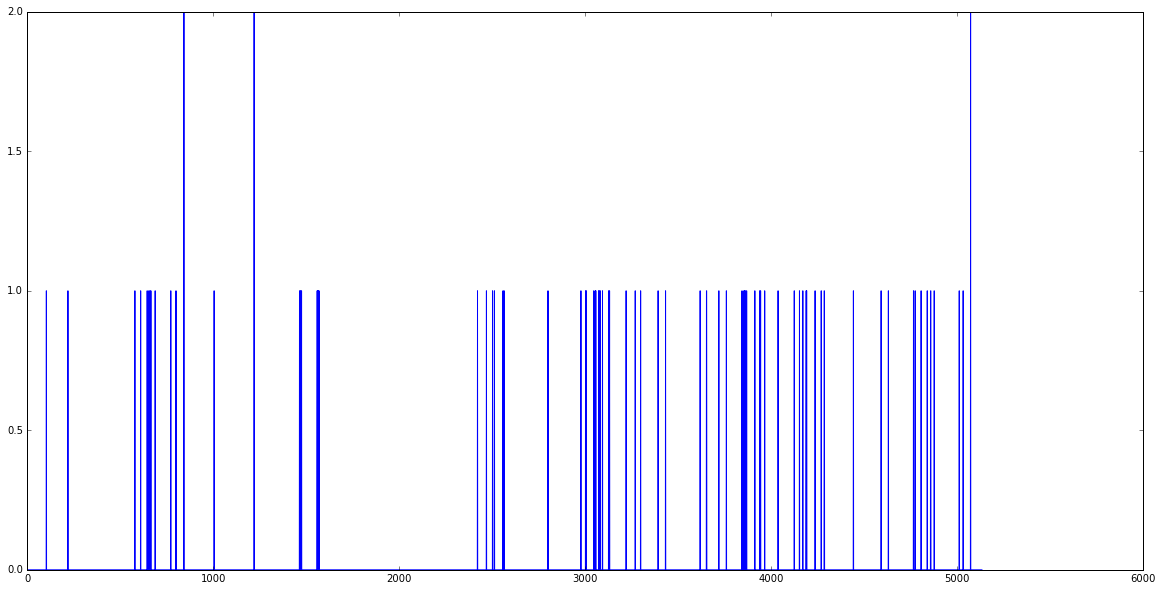

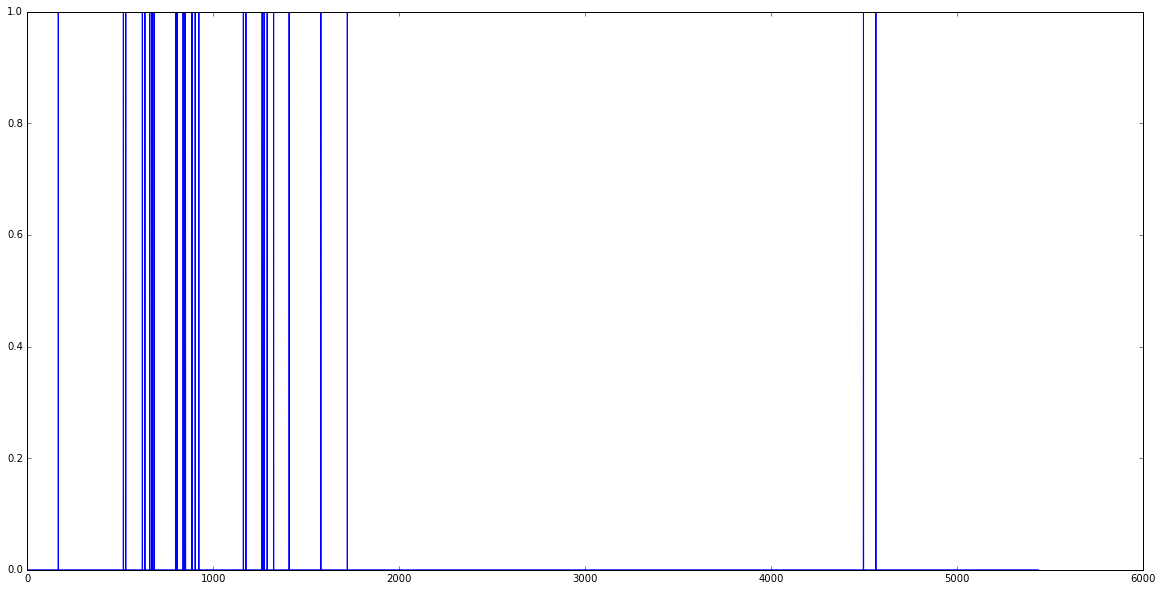

RTC


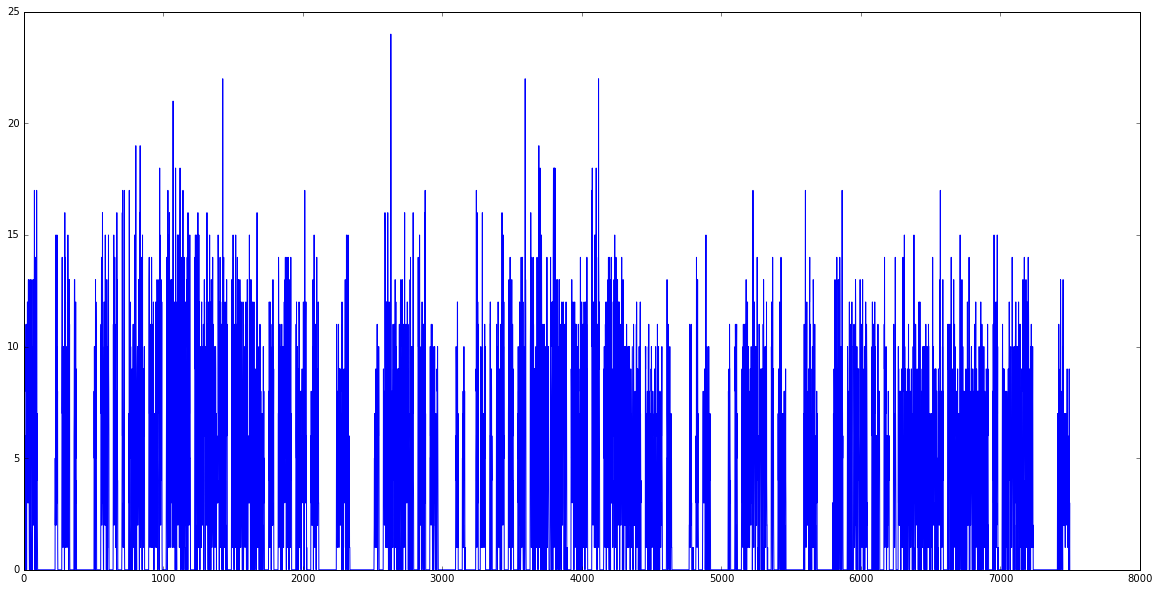

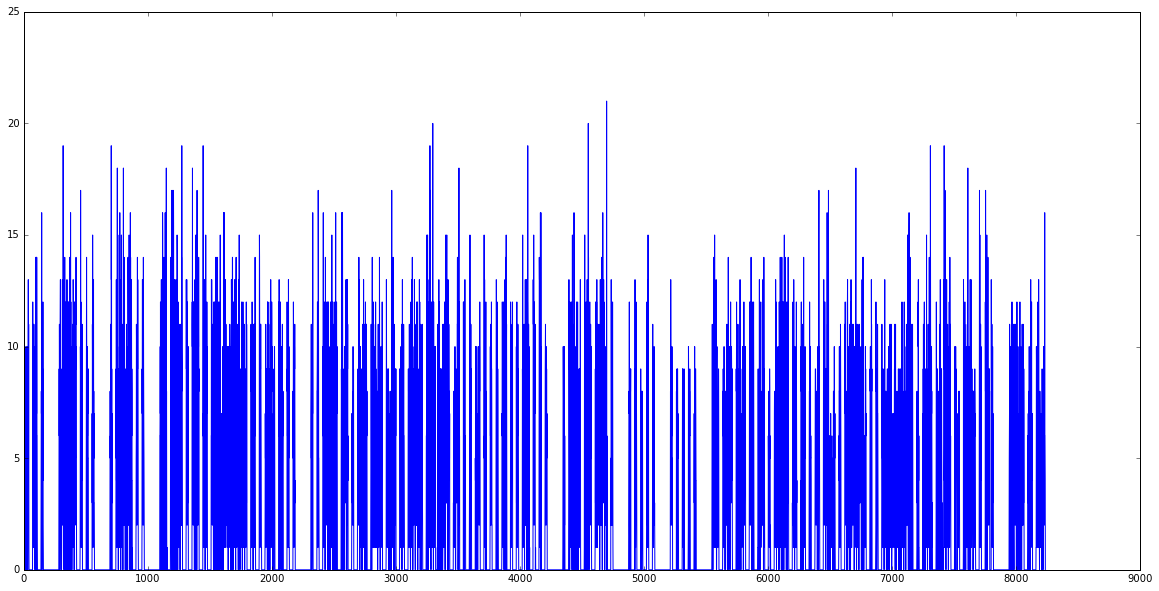

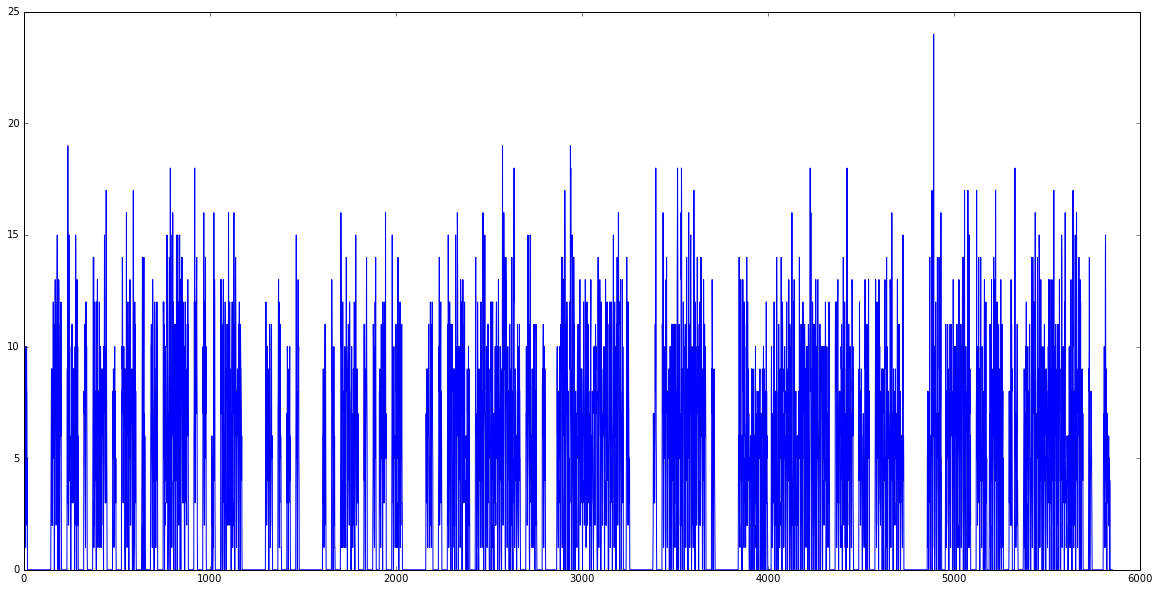

Gestion DZ


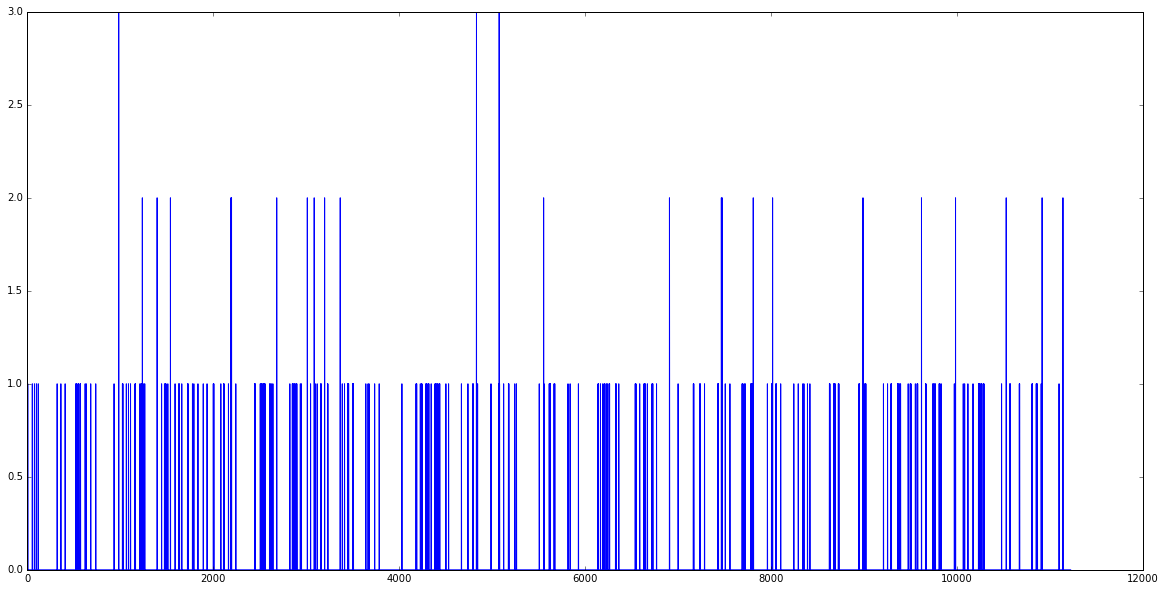

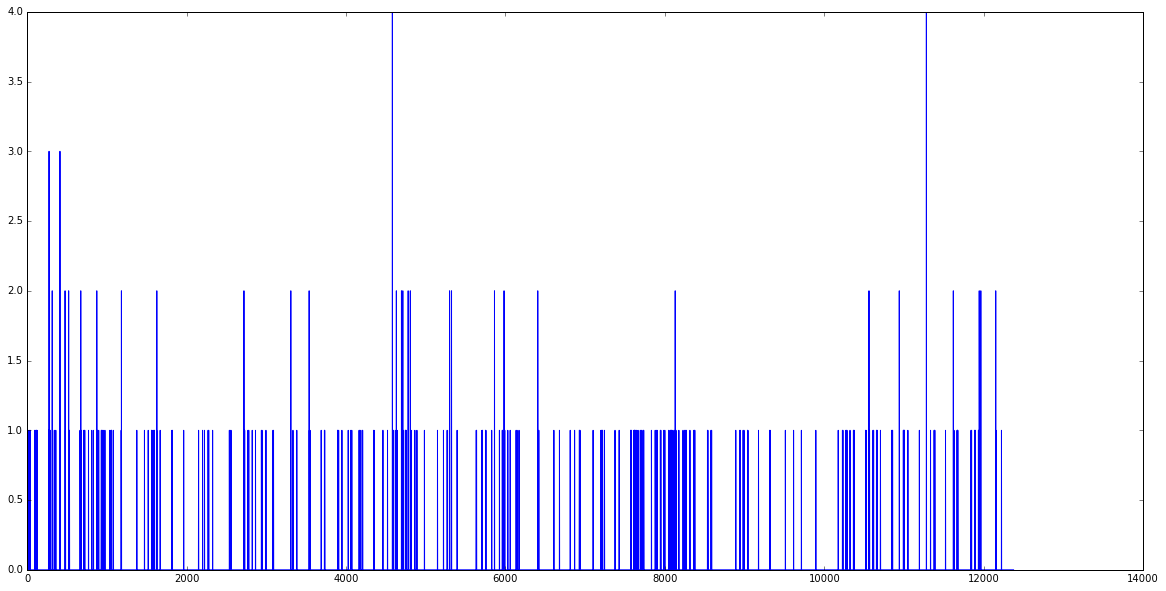

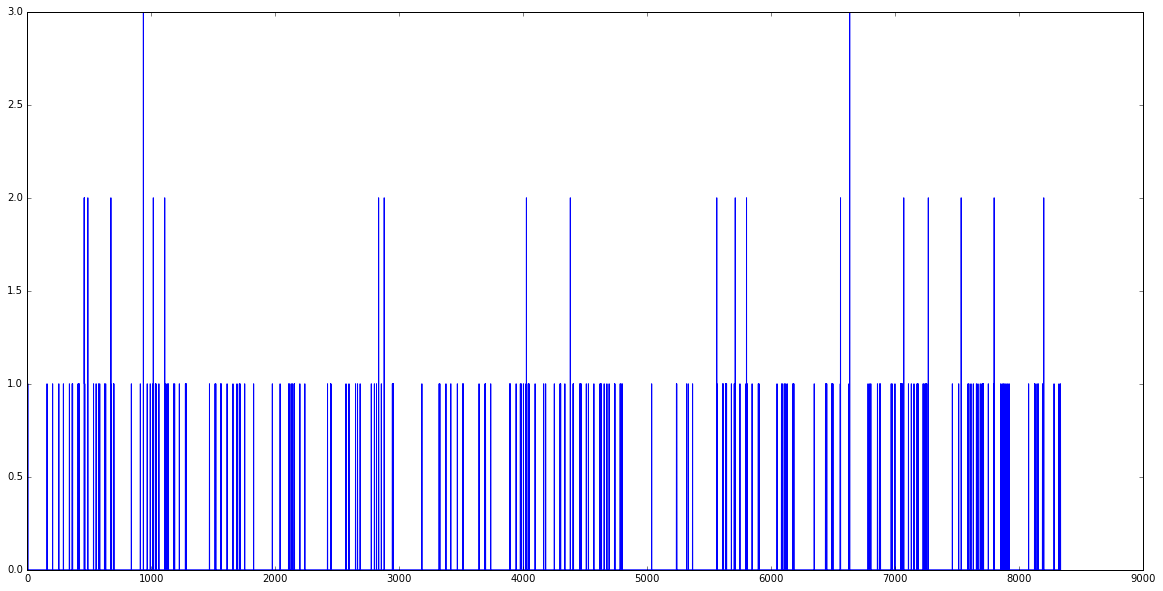

Regulation Medicale


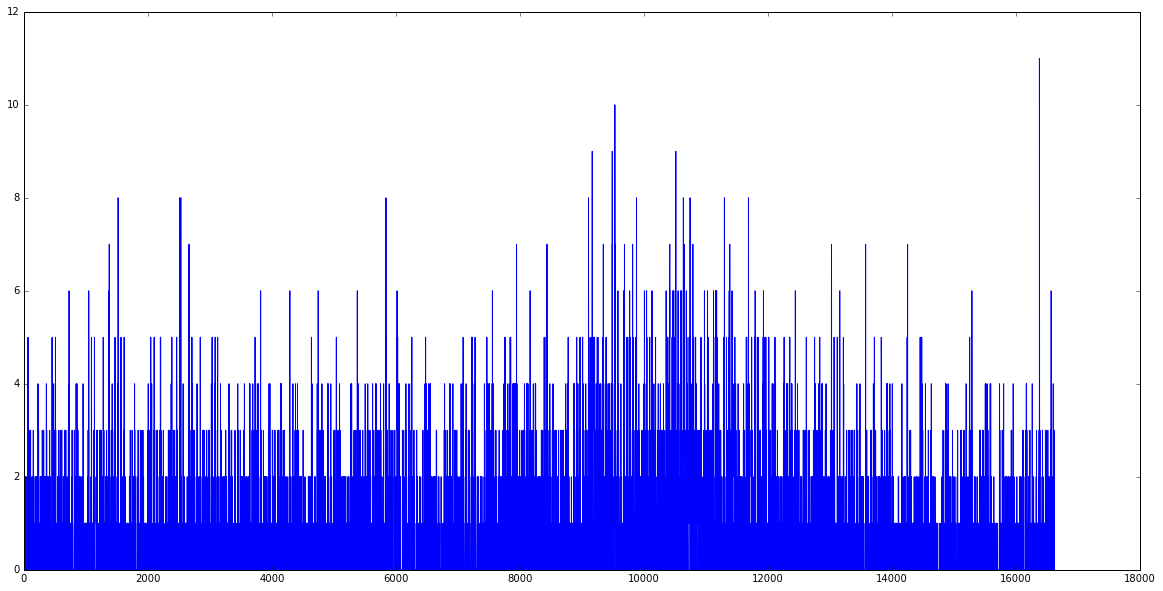

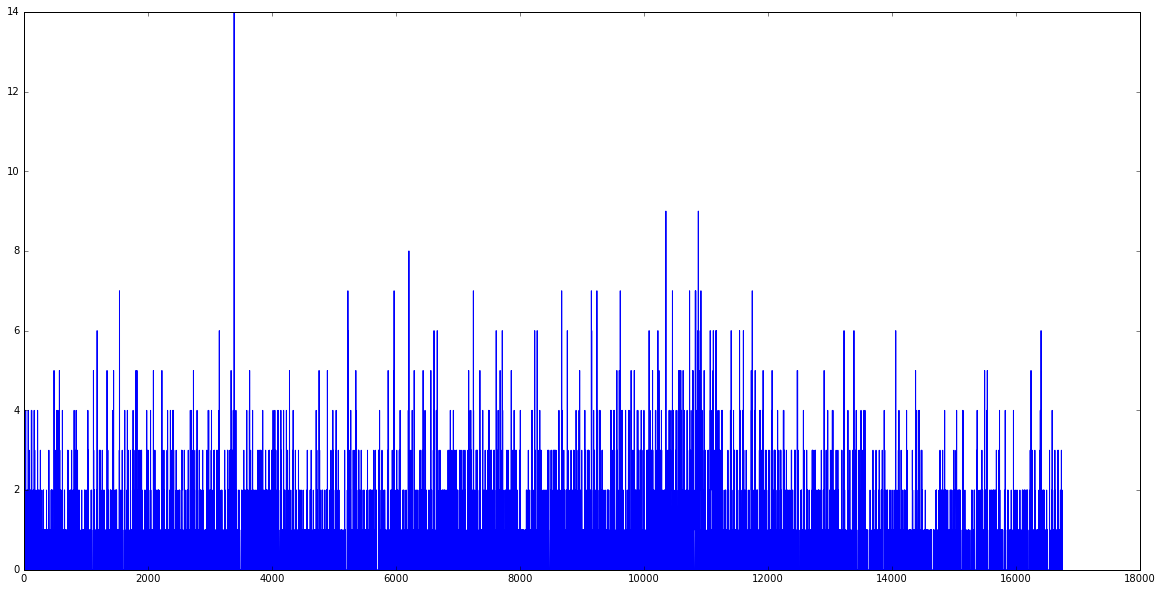

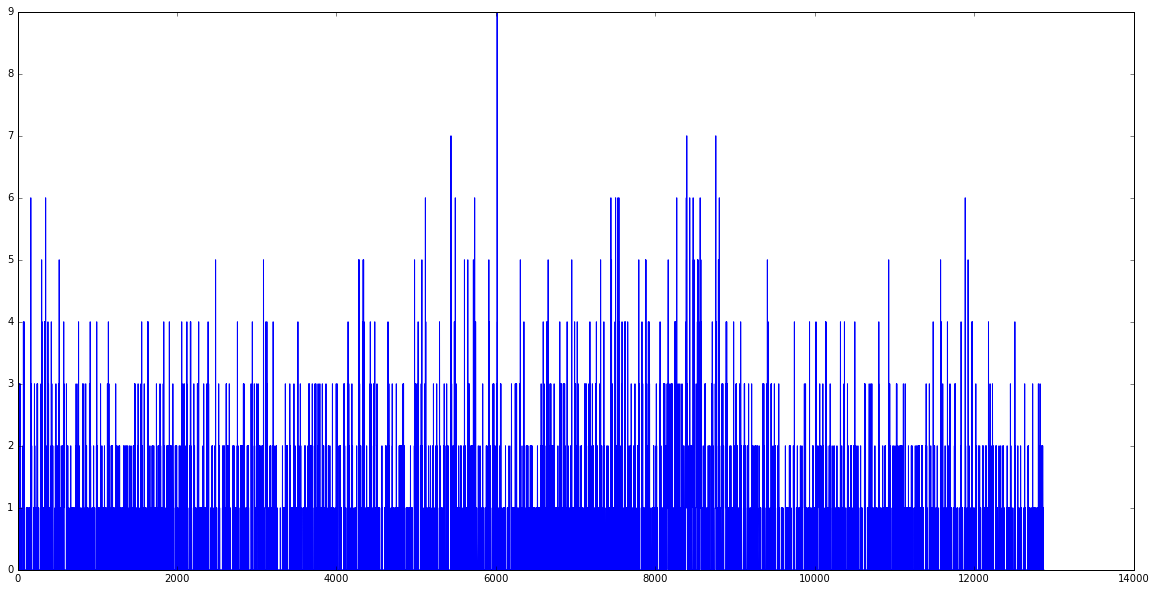

Nuit


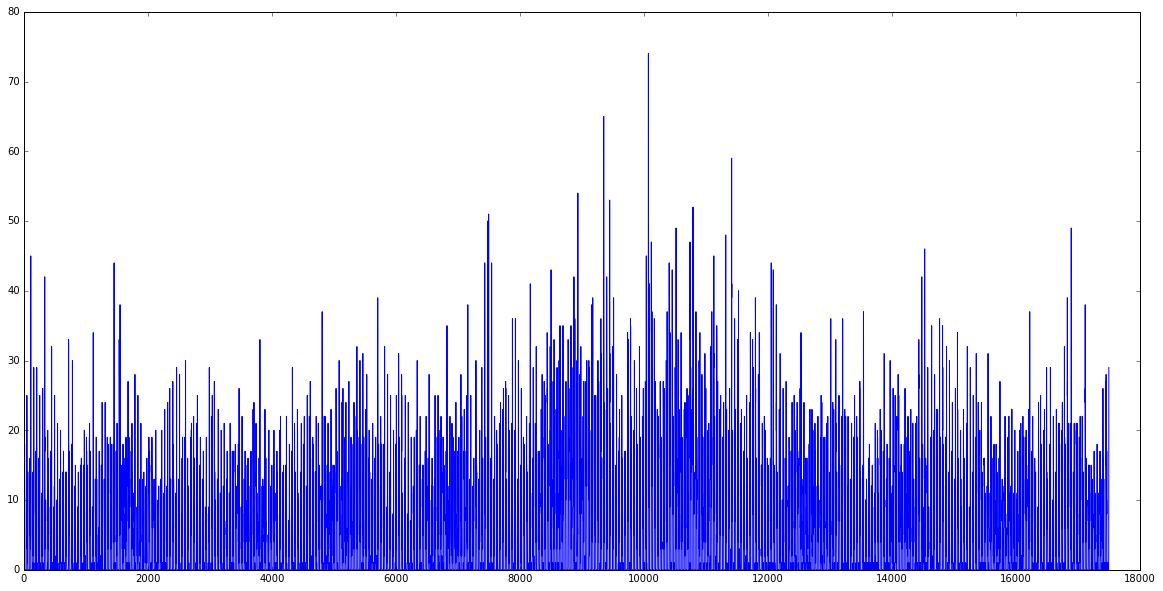

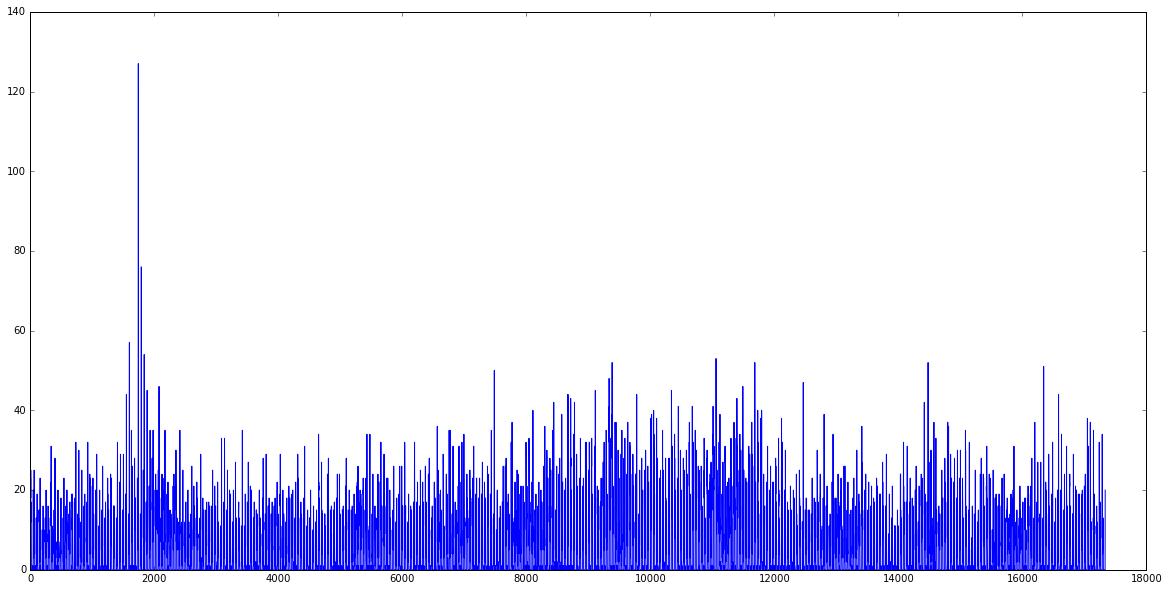

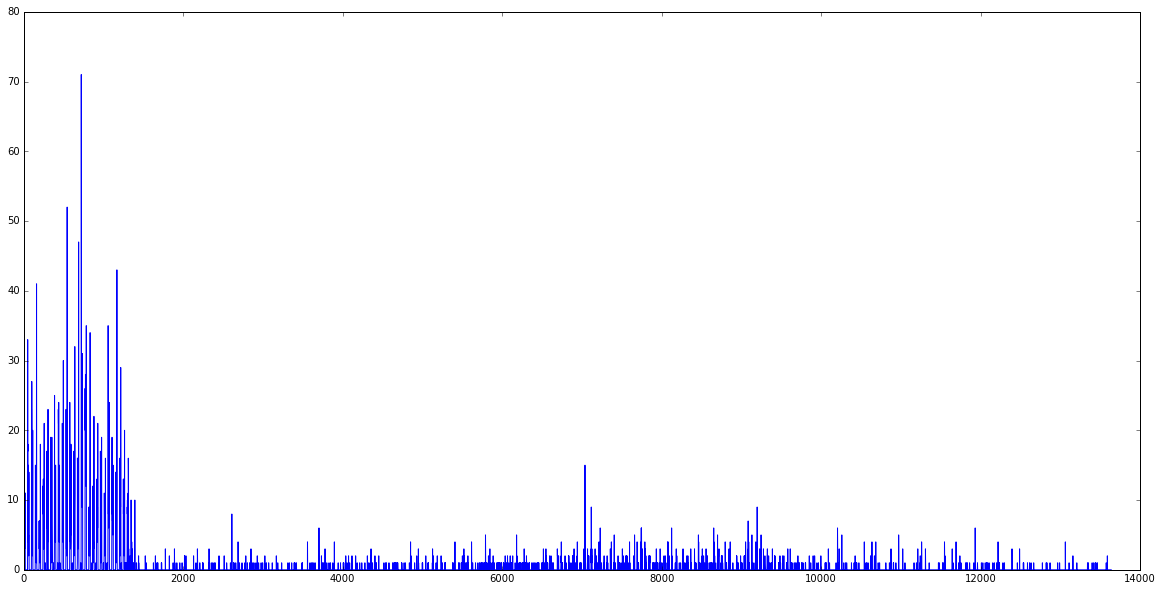

Médical


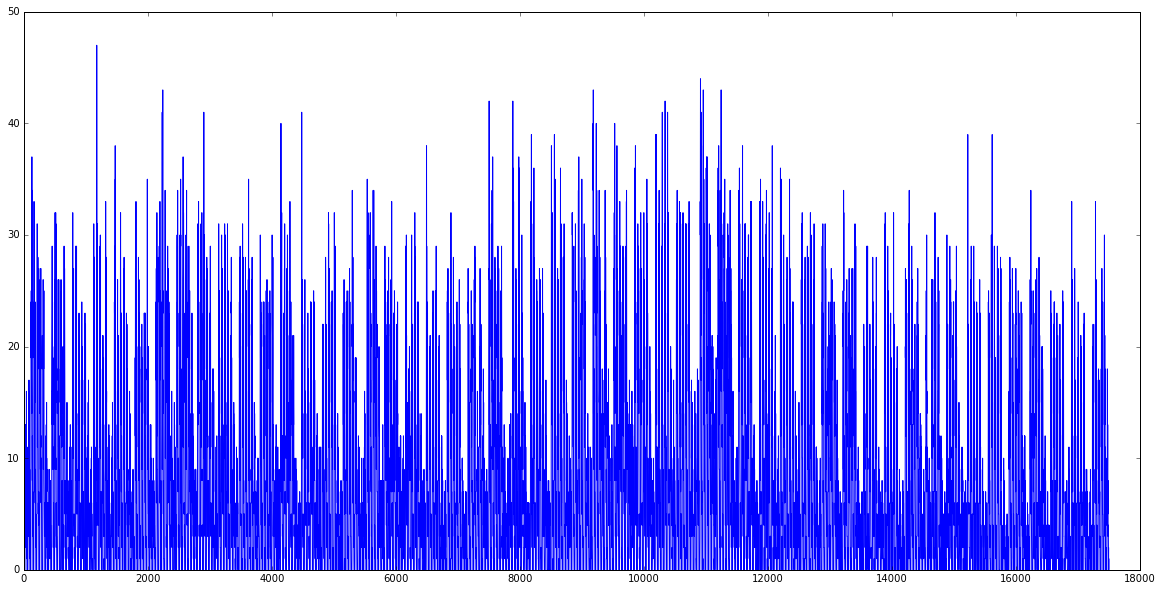

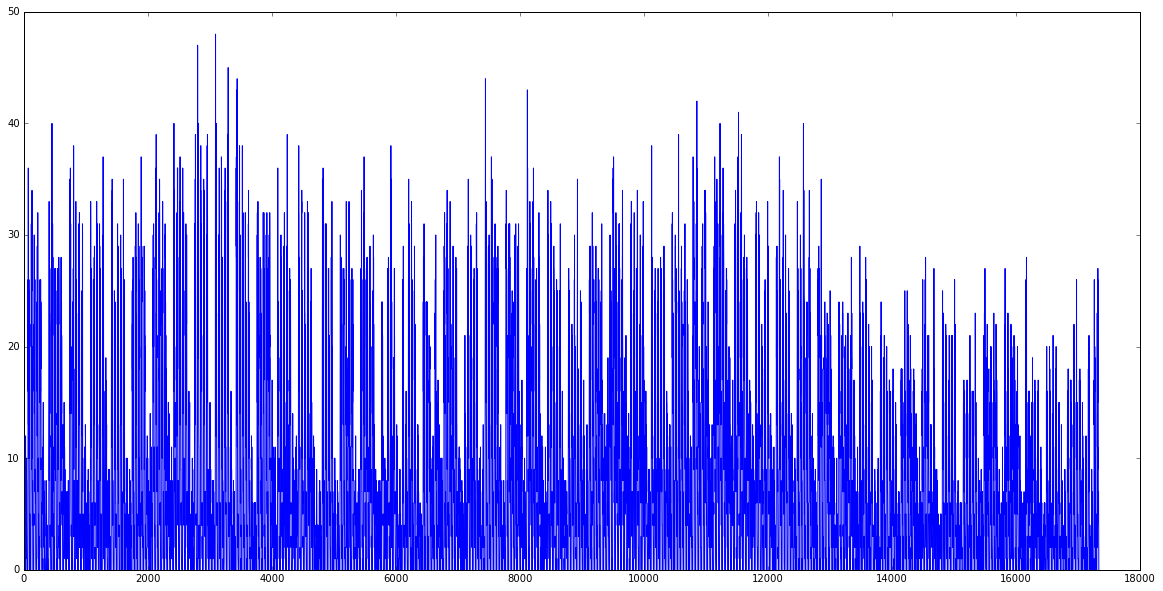

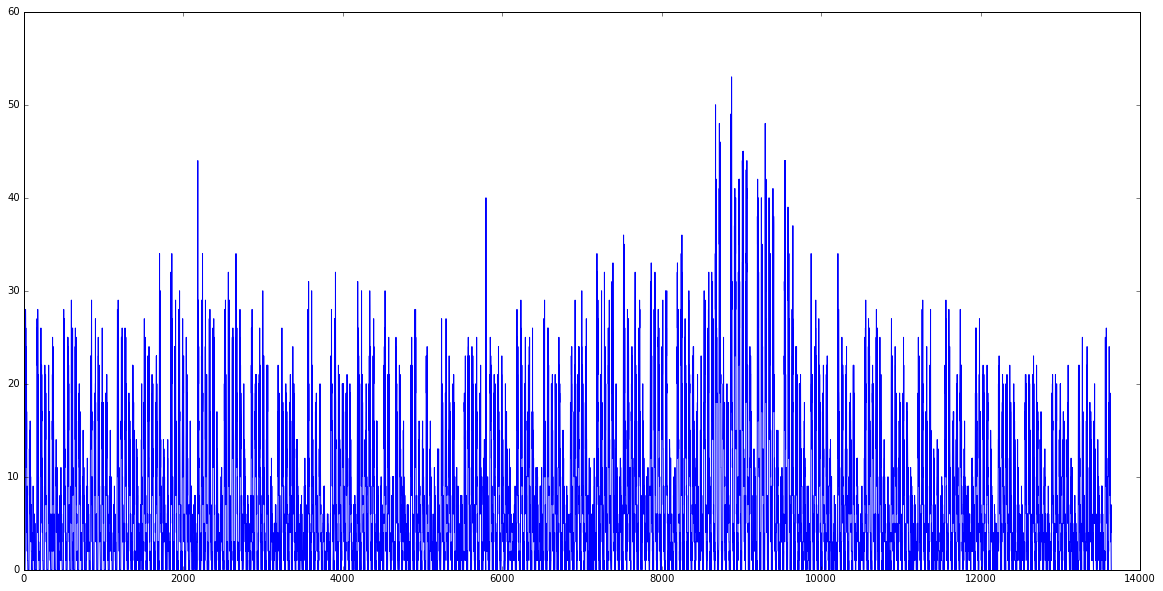

Gestion - Accueil Telephonique


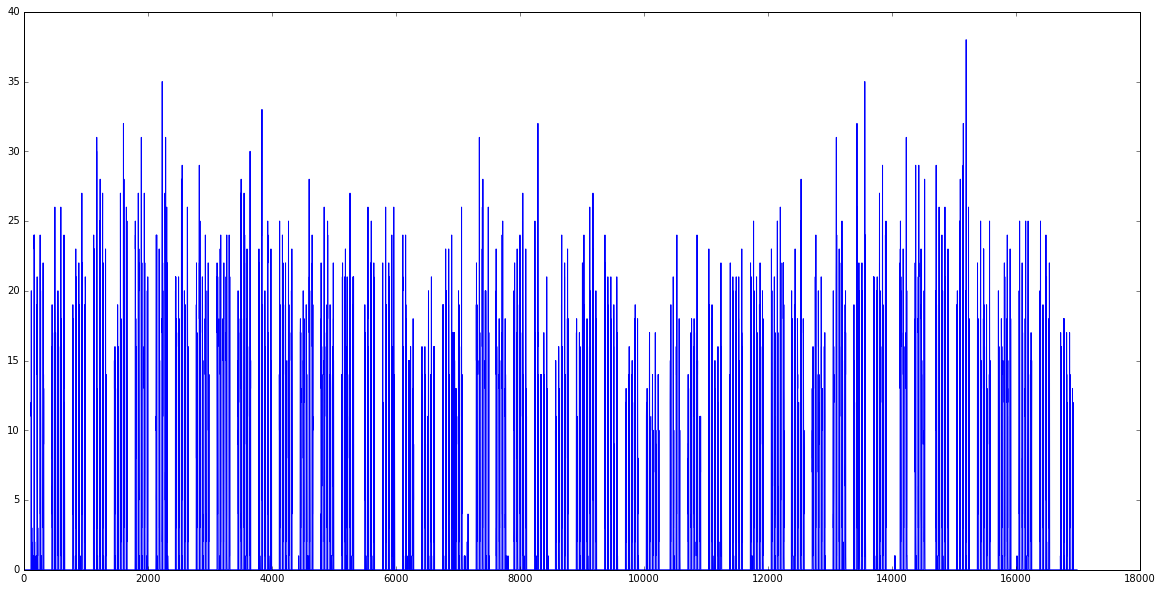

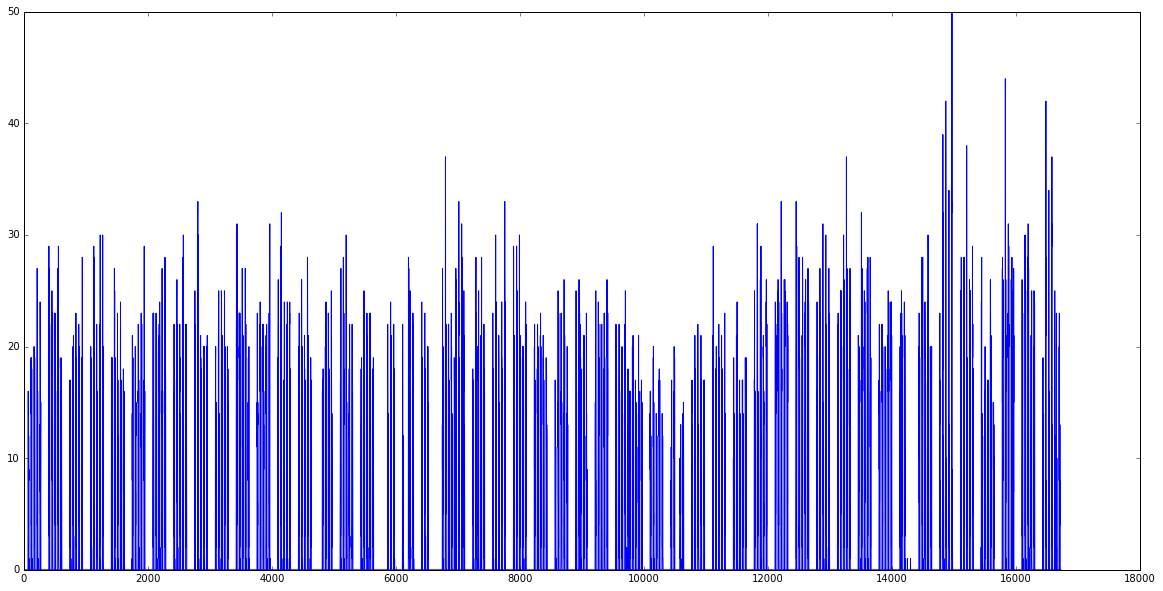

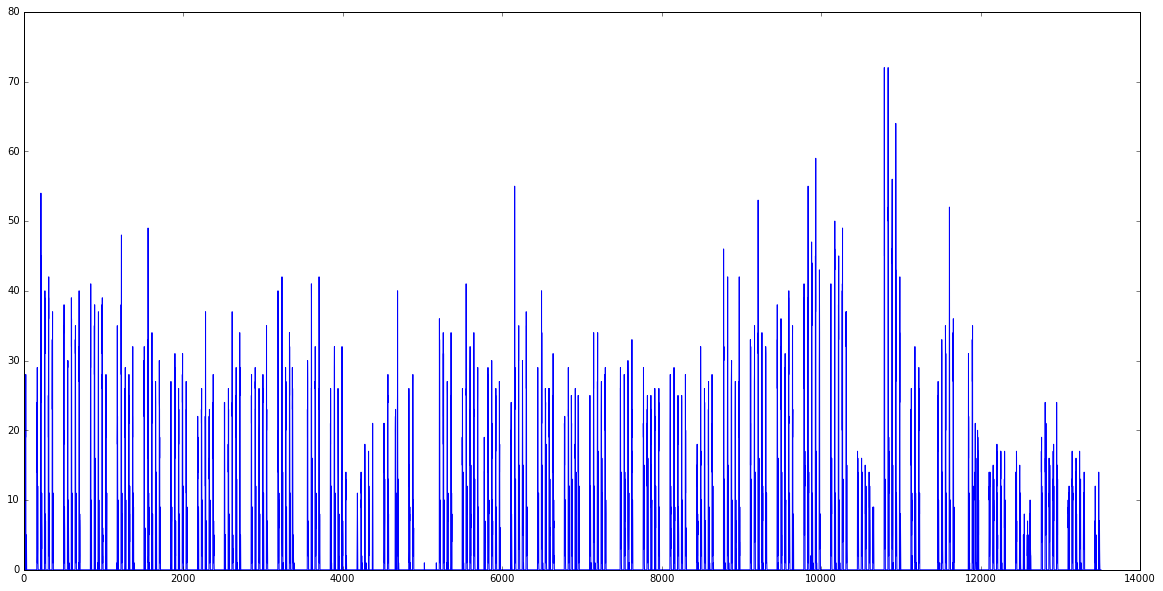

Services


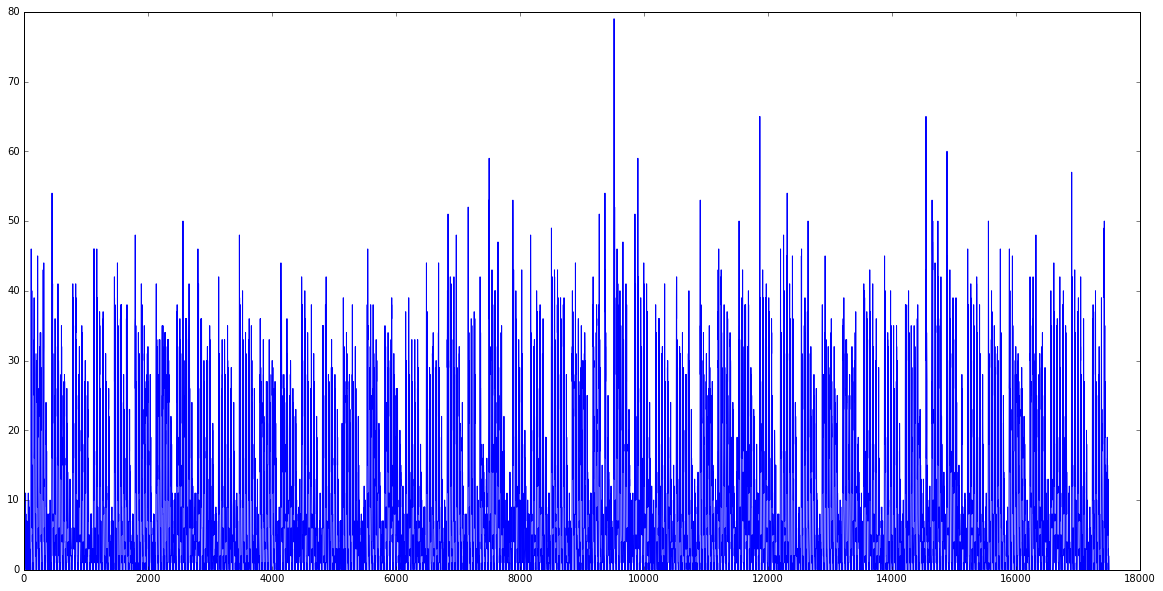

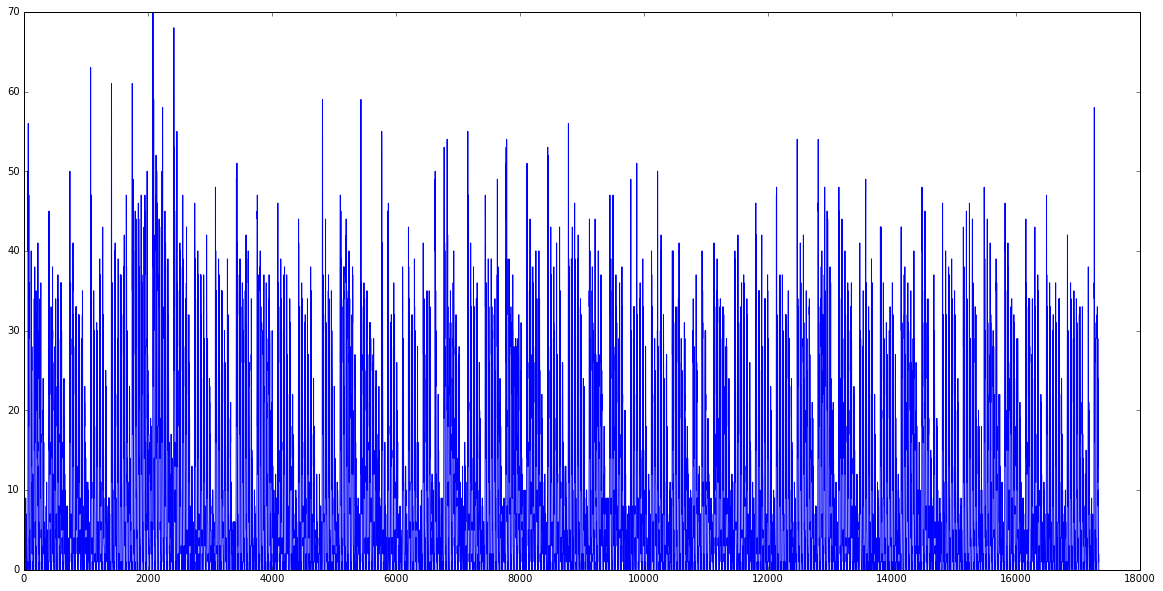

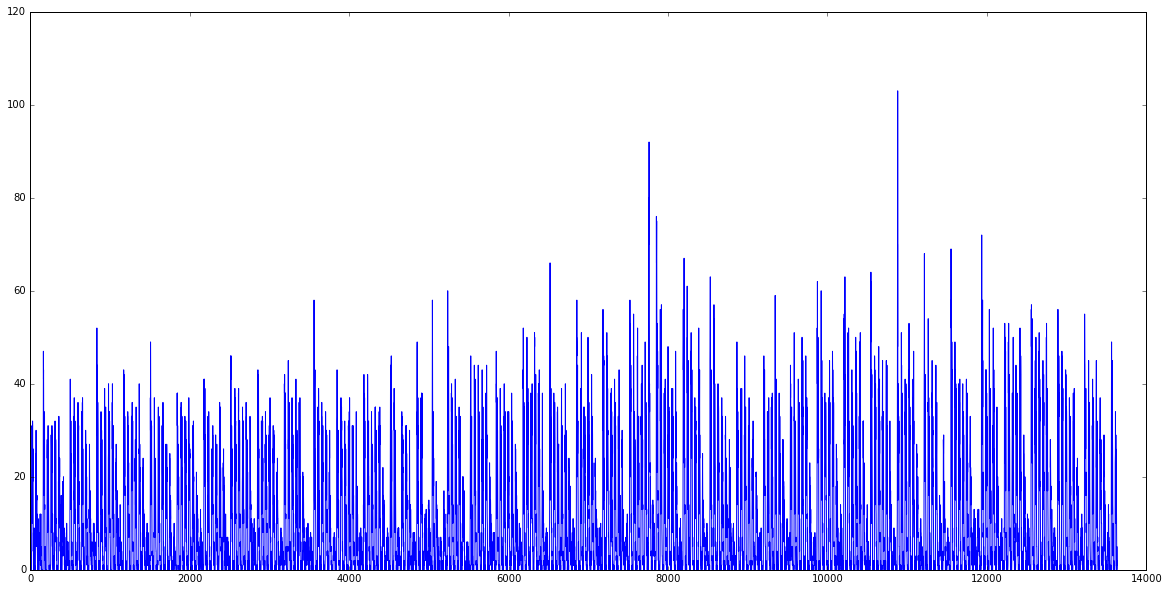

SAP


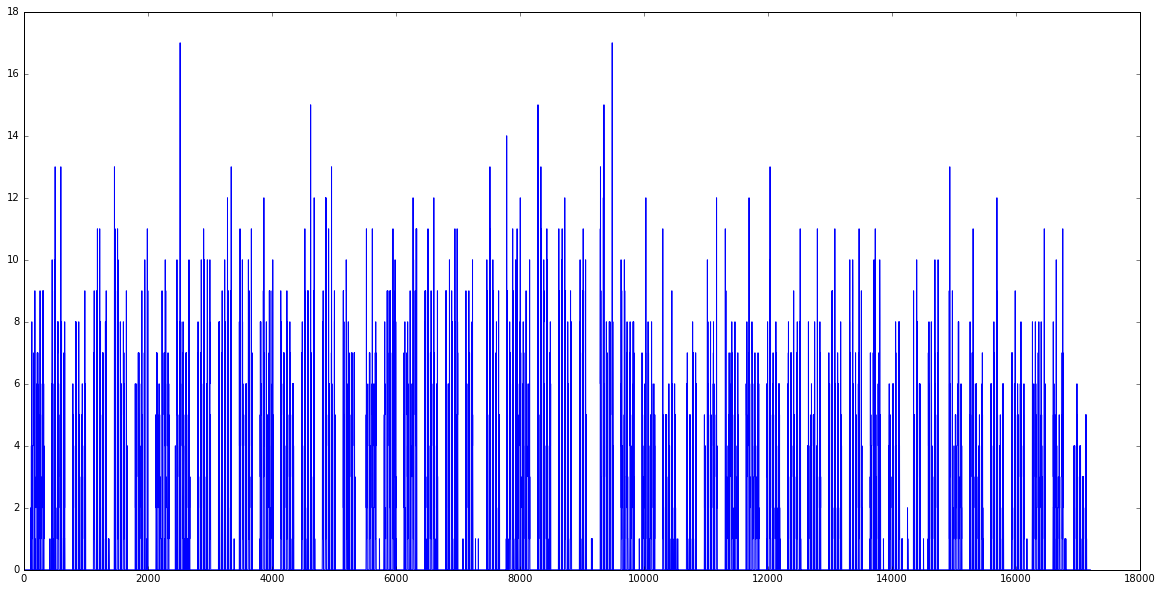

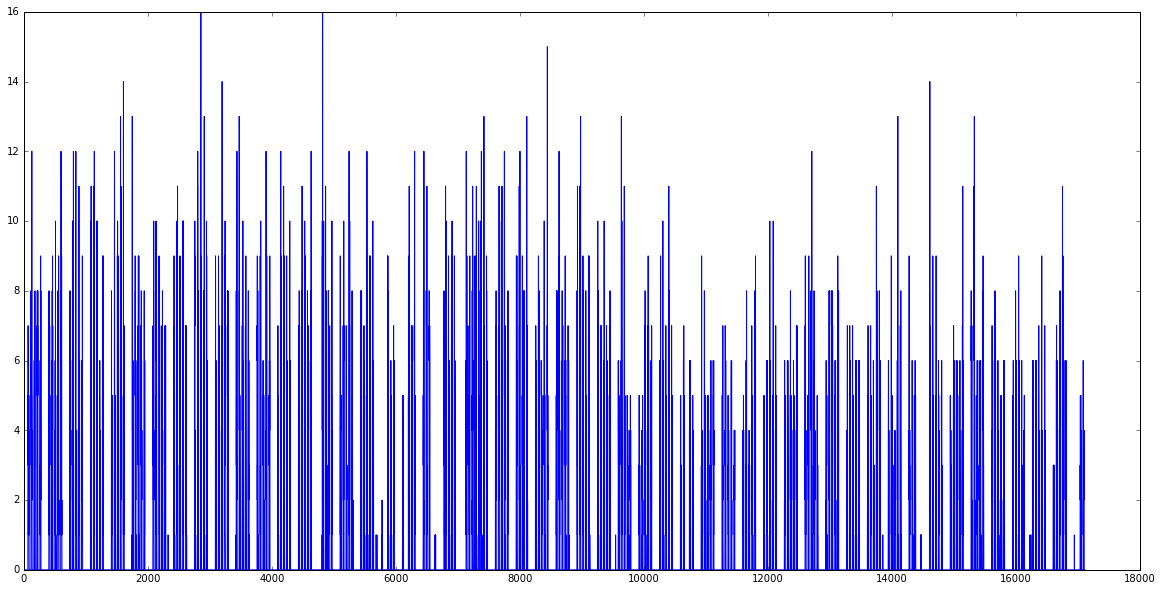

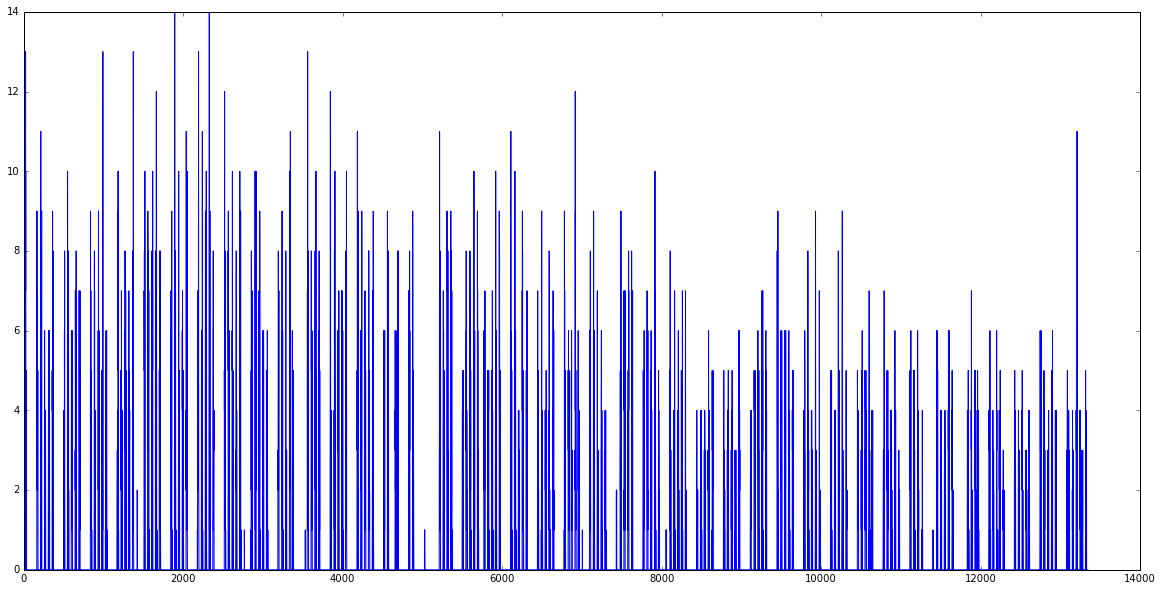

Gestion Renault


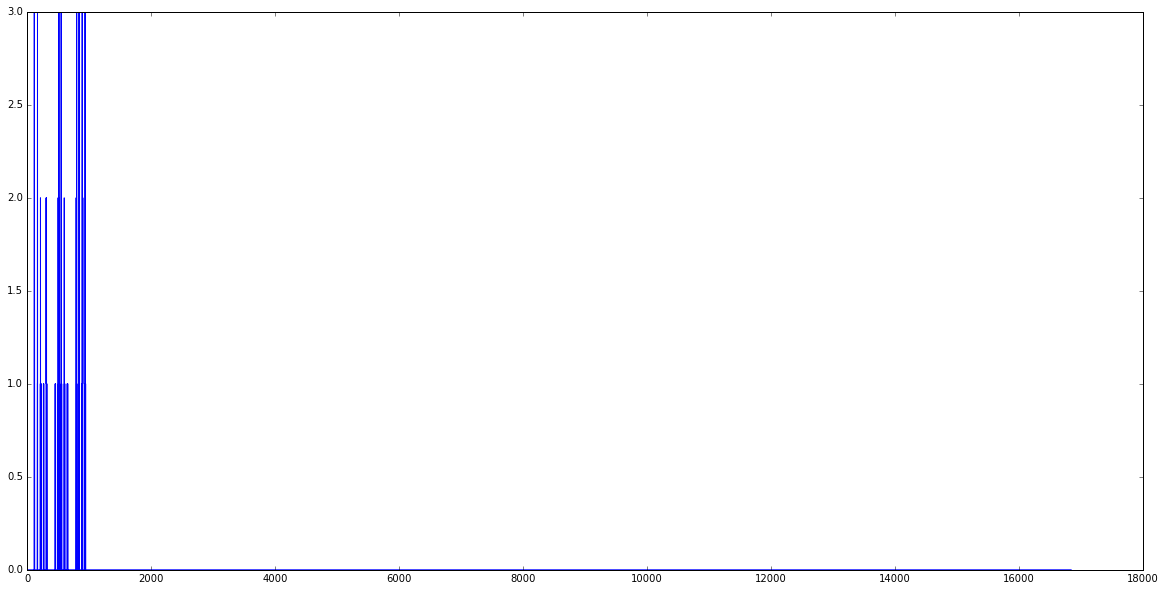

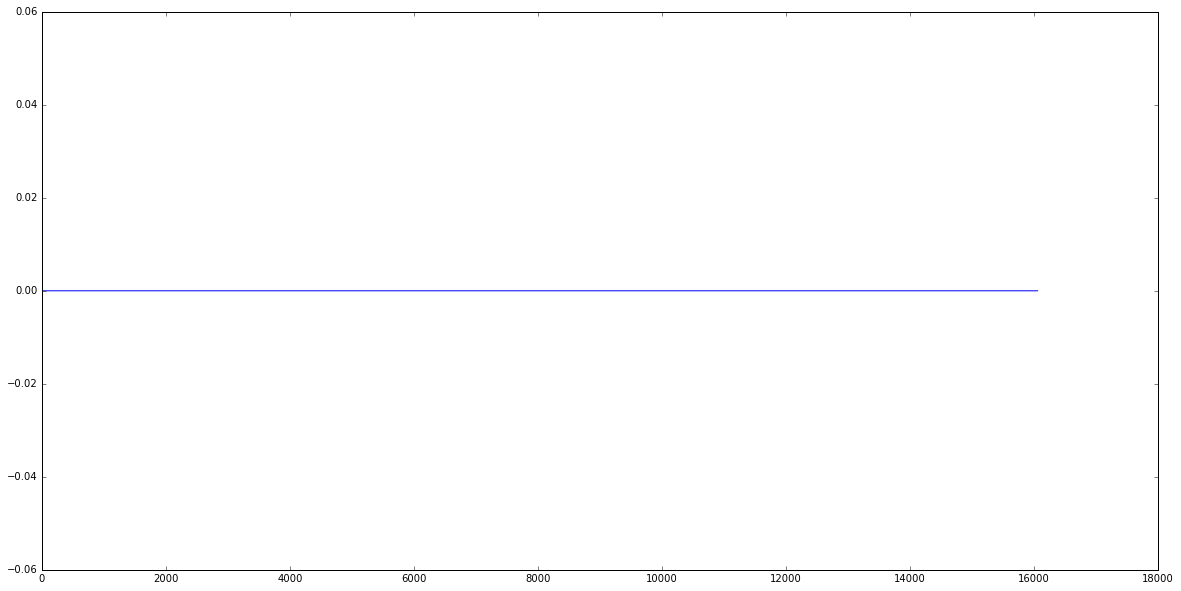

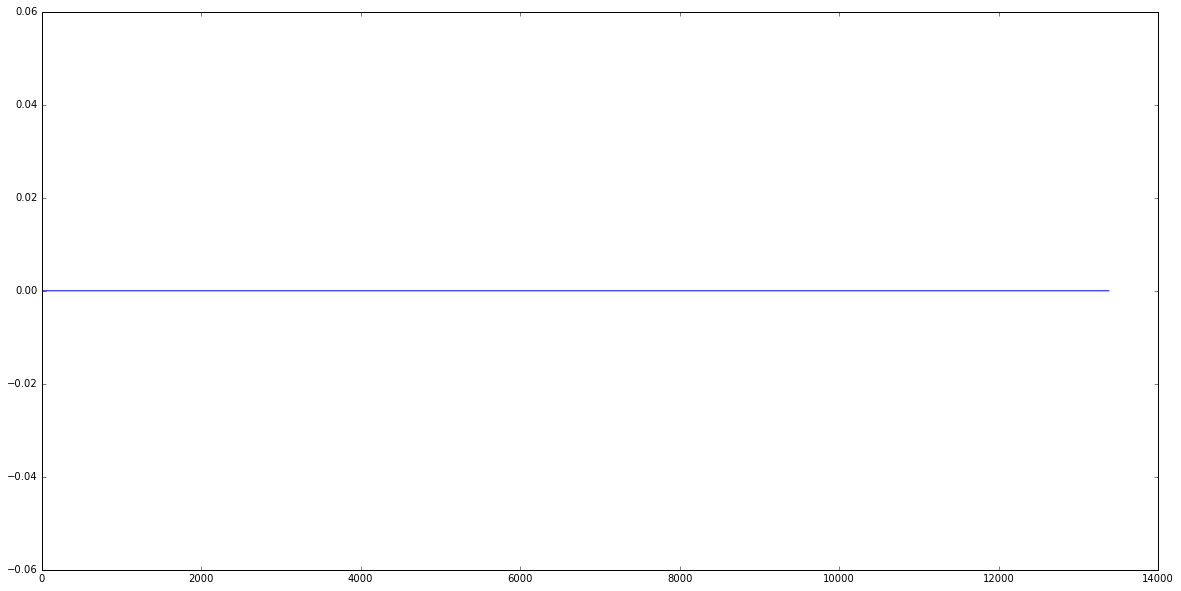

RENAULT


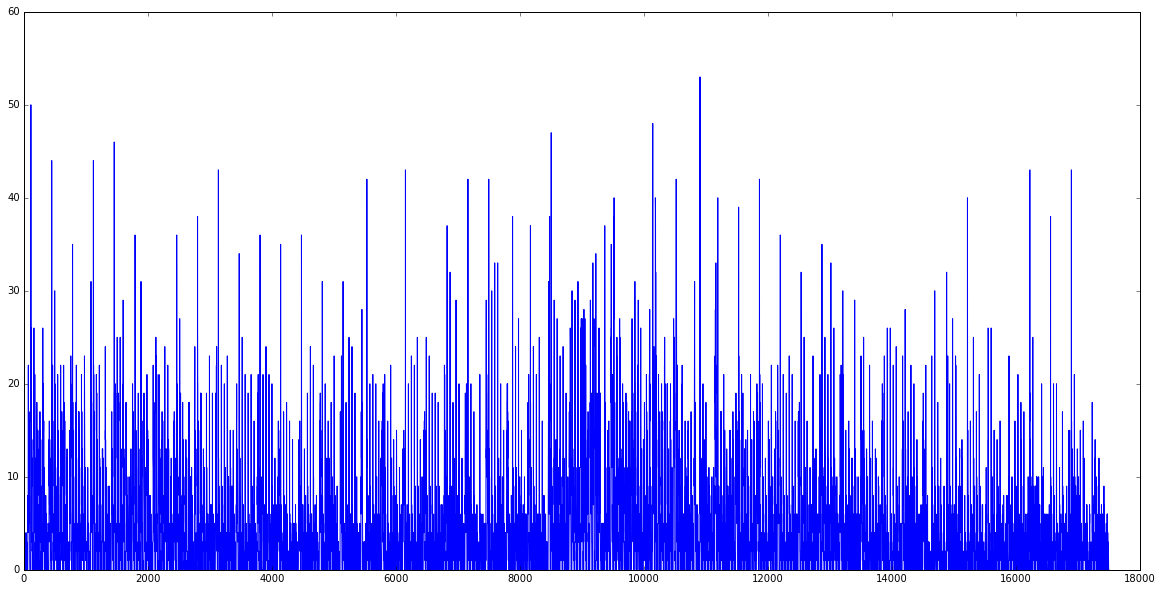

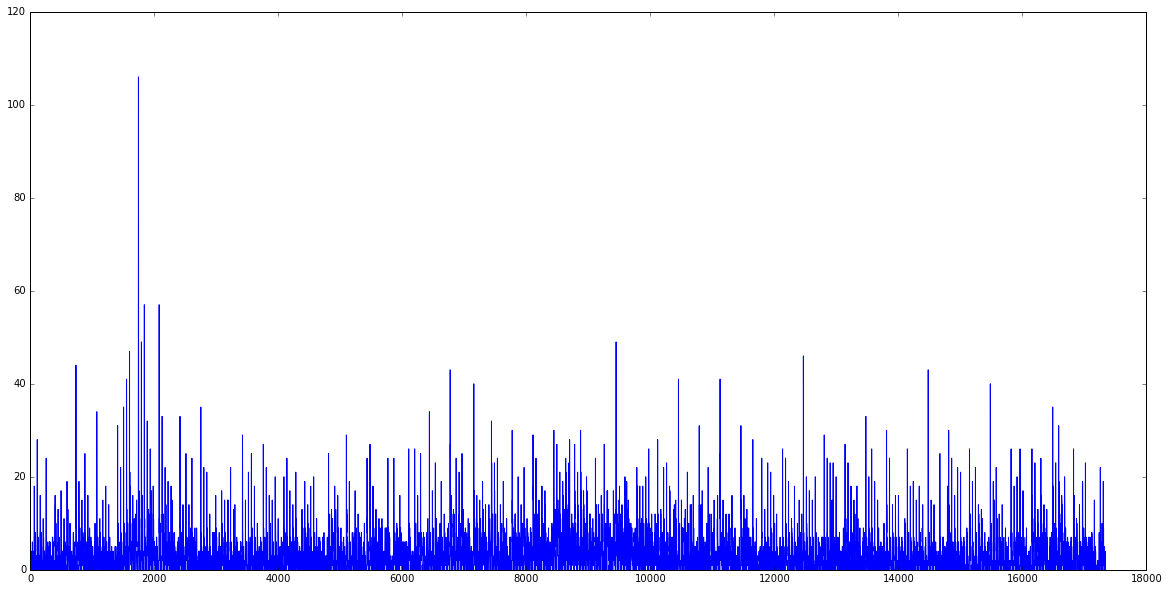

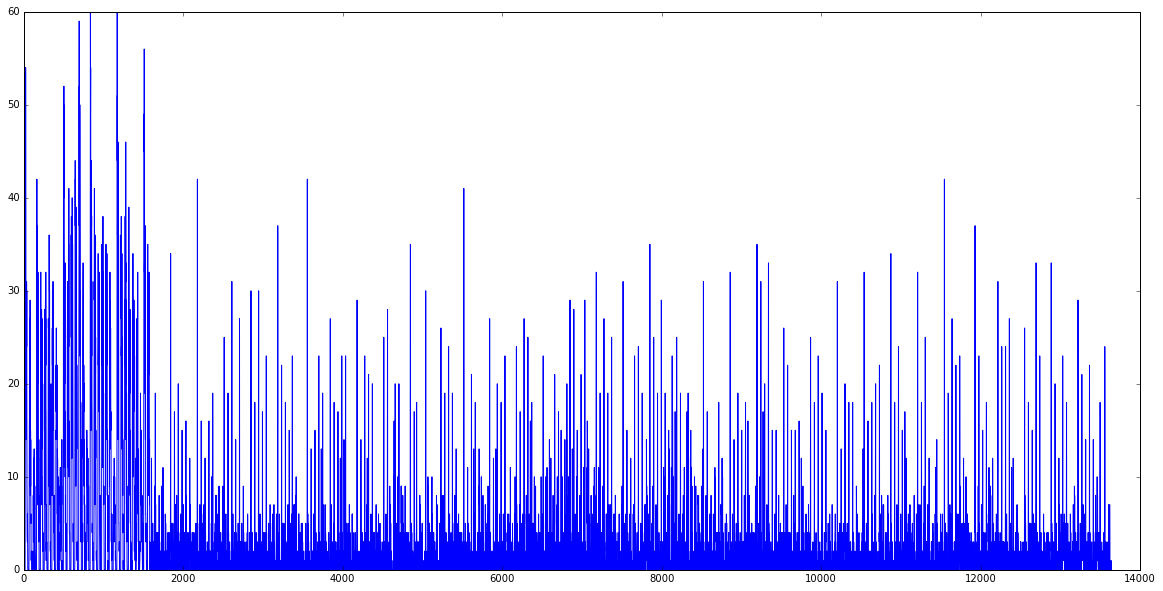

Gestion Amex


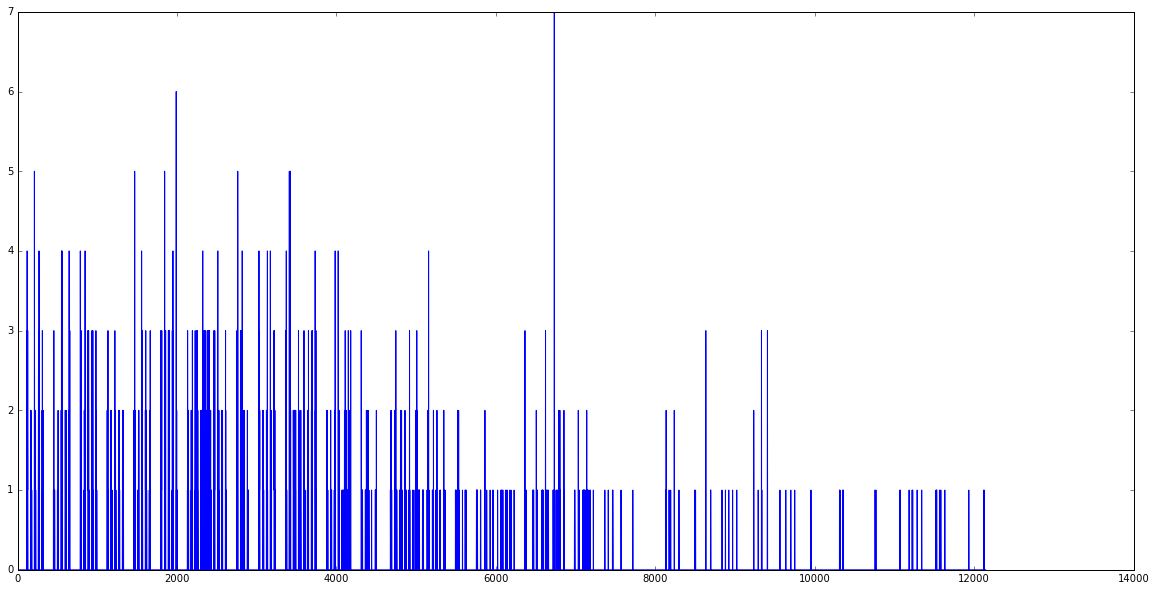

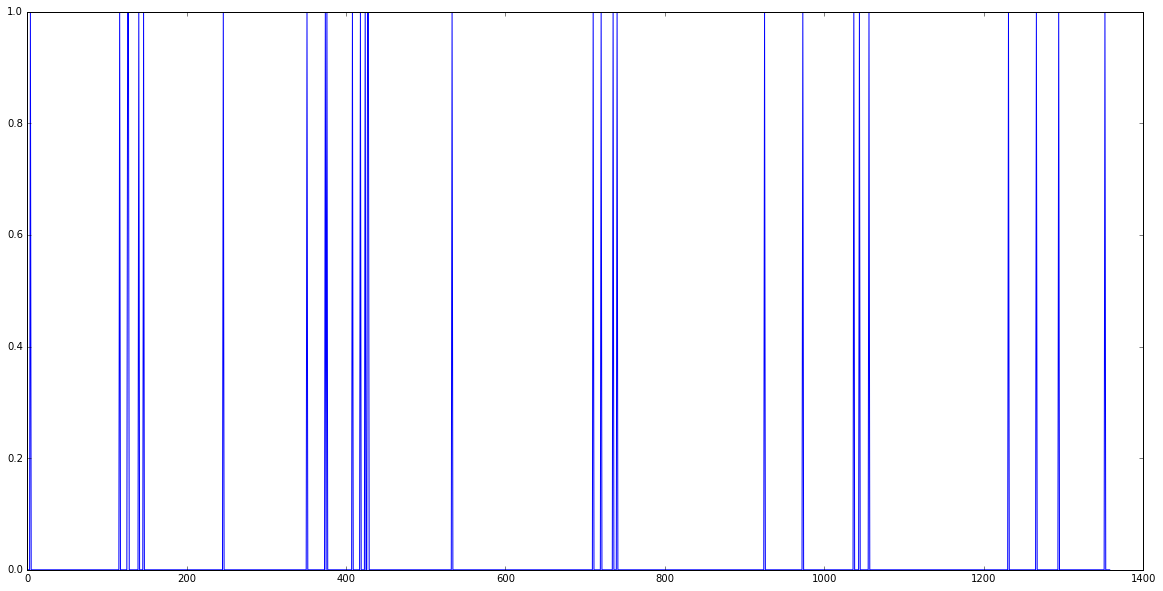

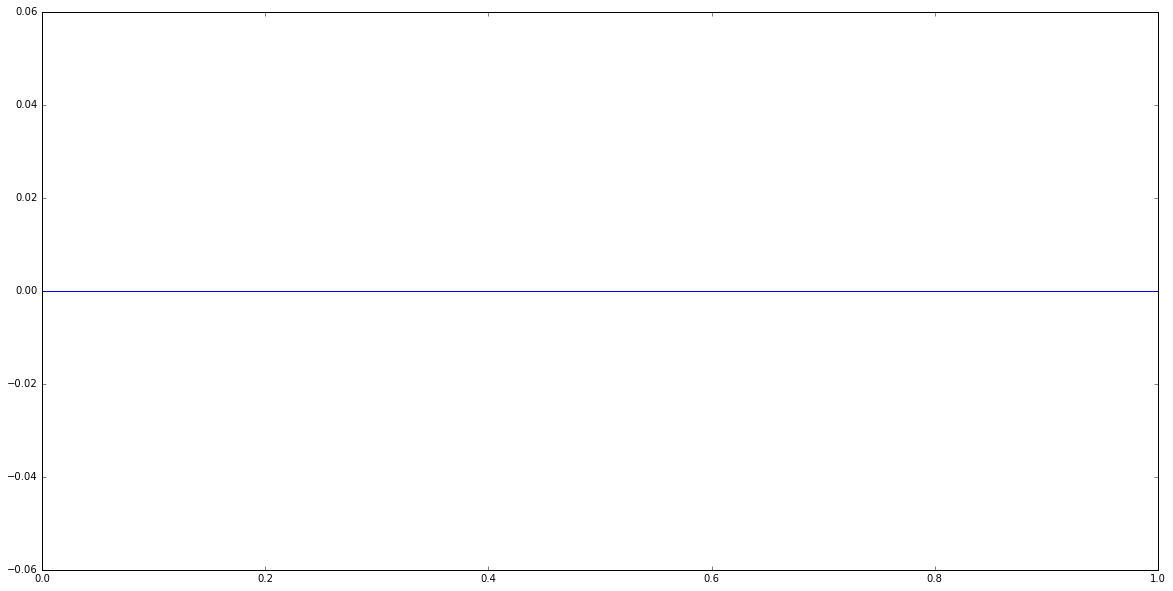

Gestion


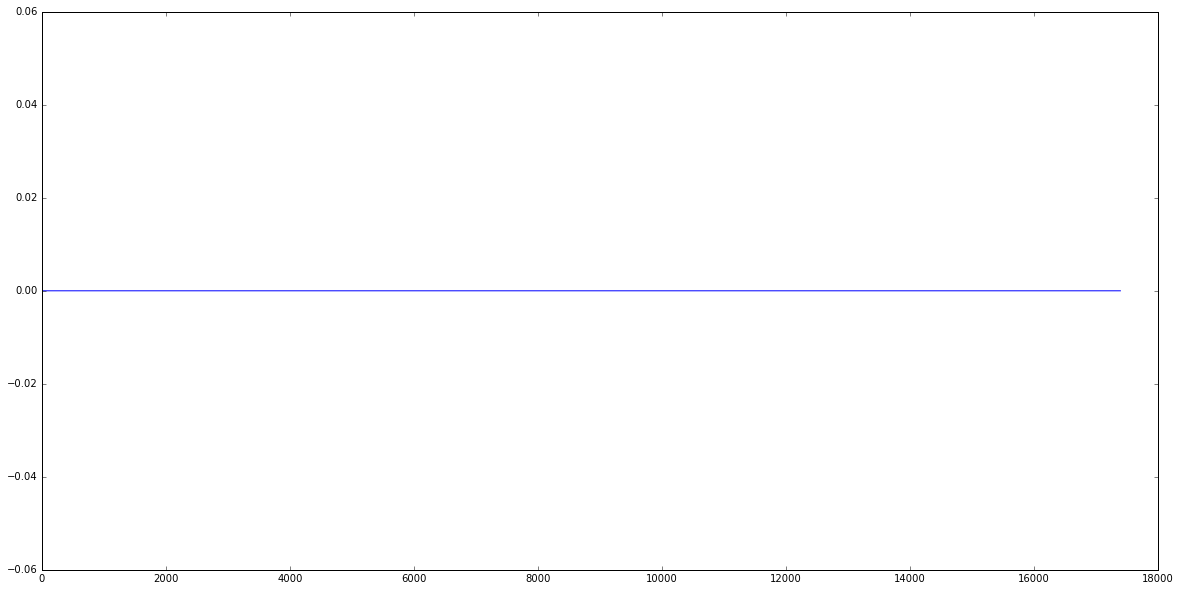

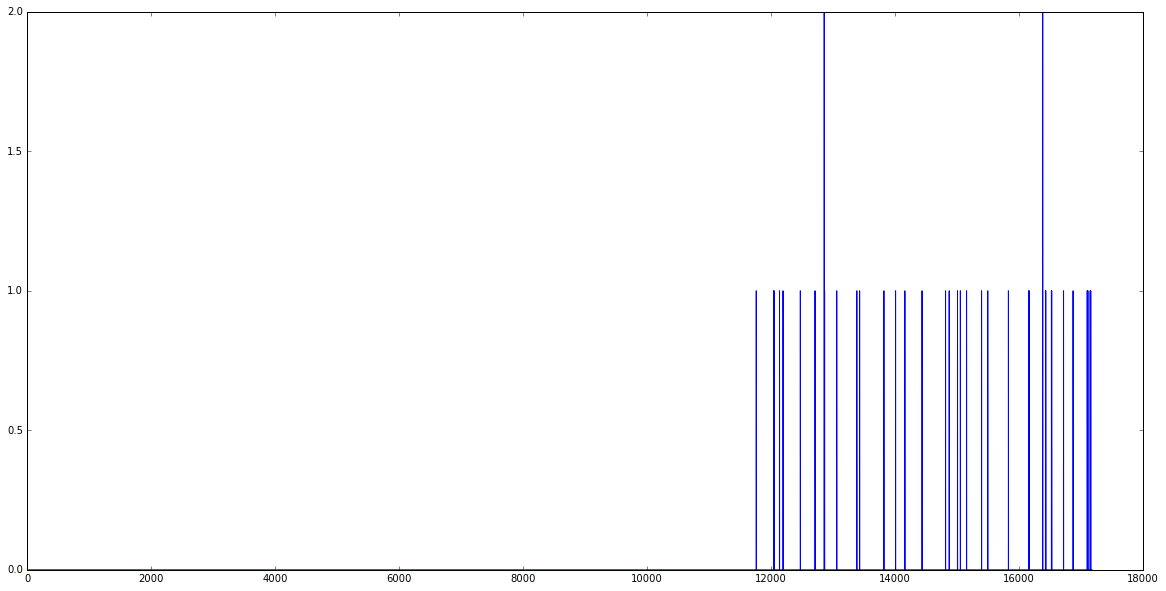

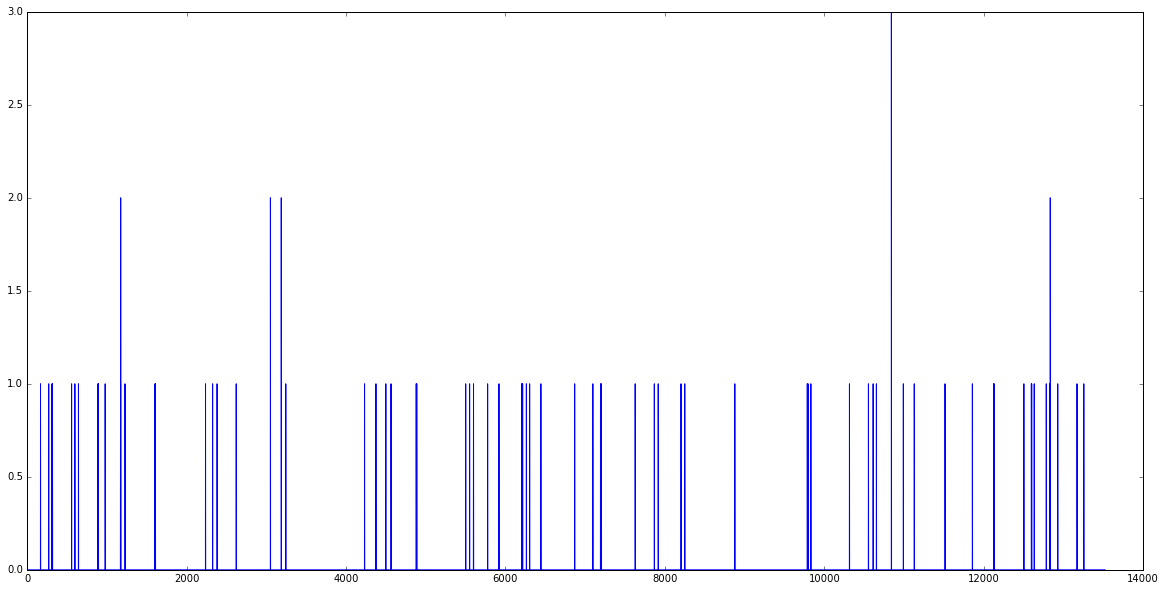

Gestion Clients


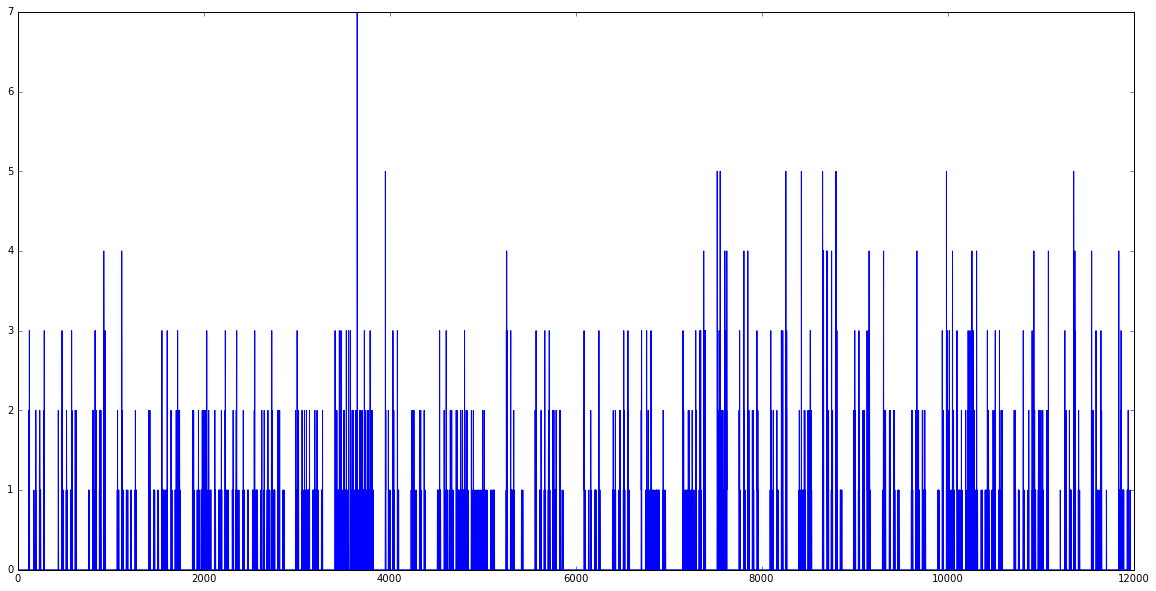

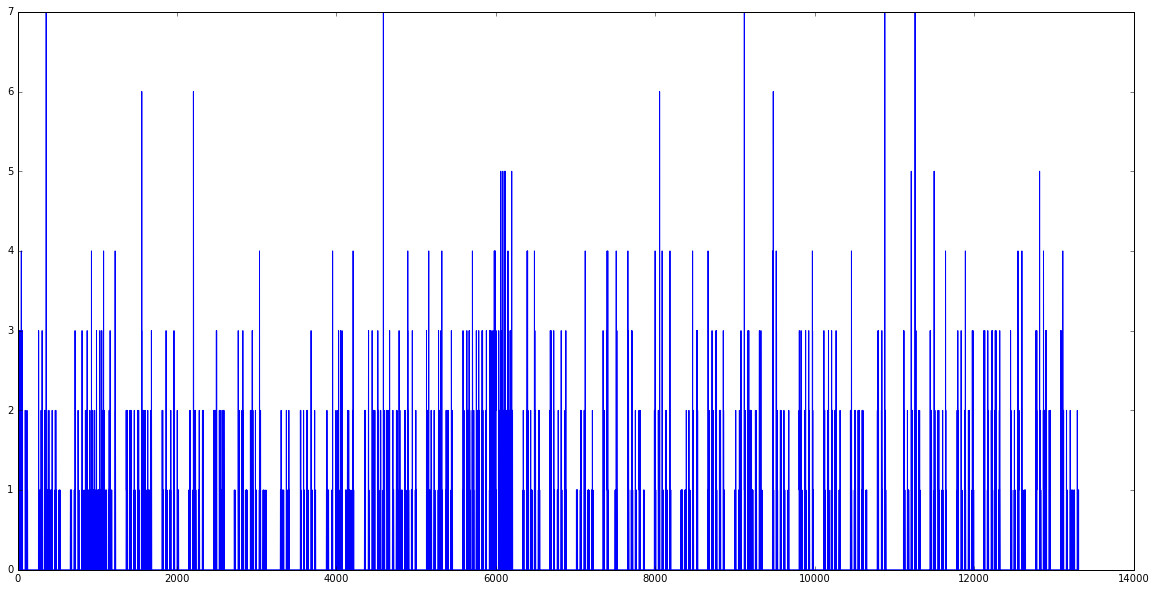

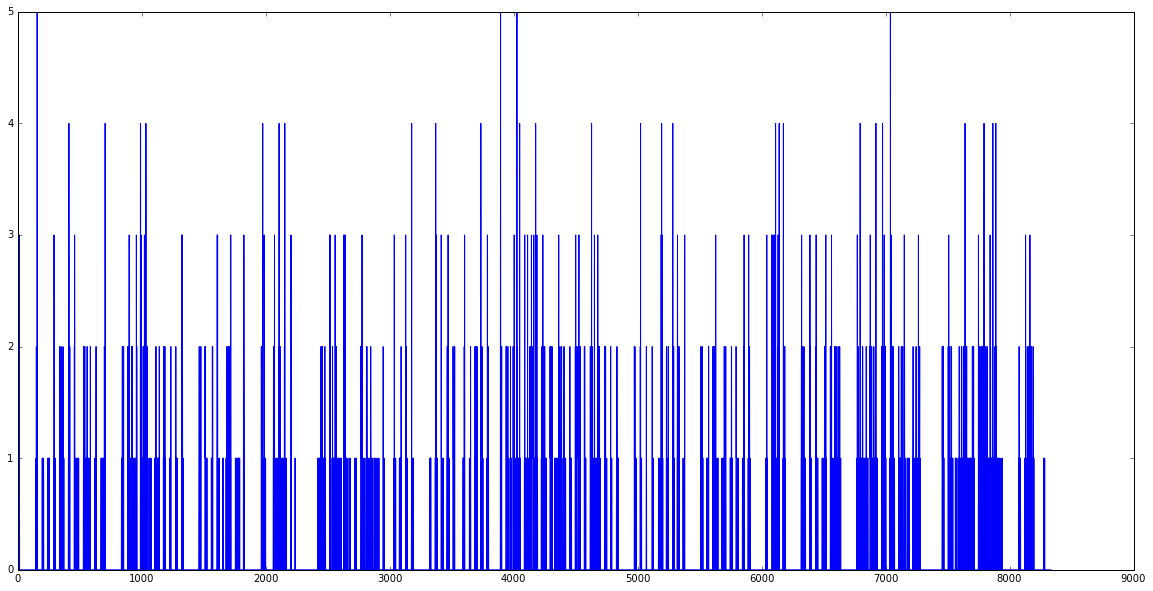

Tech. Inter


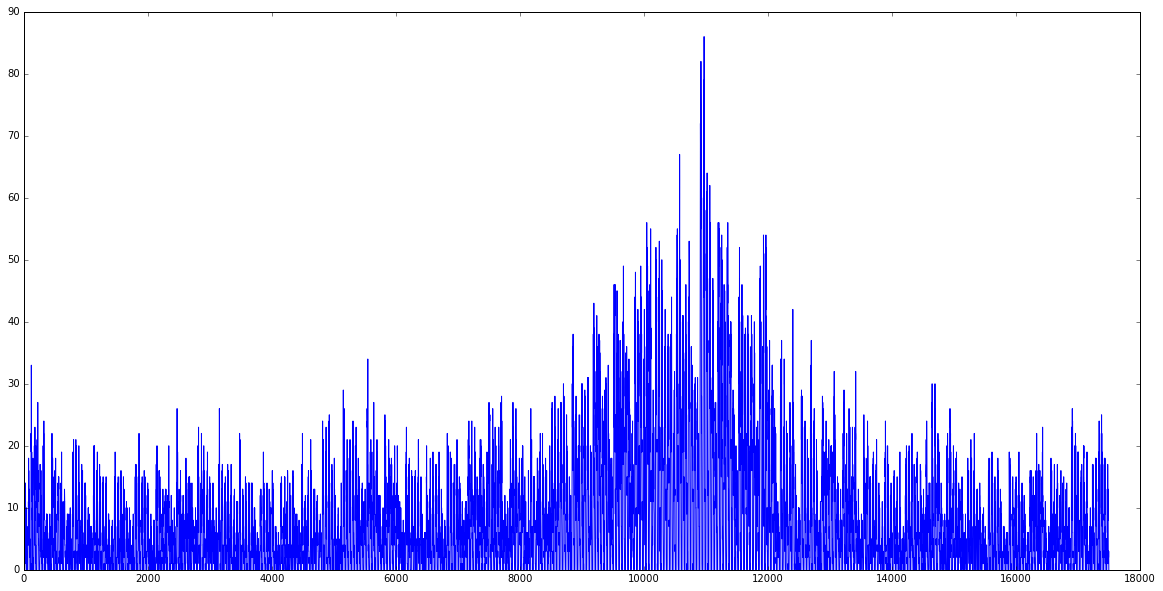

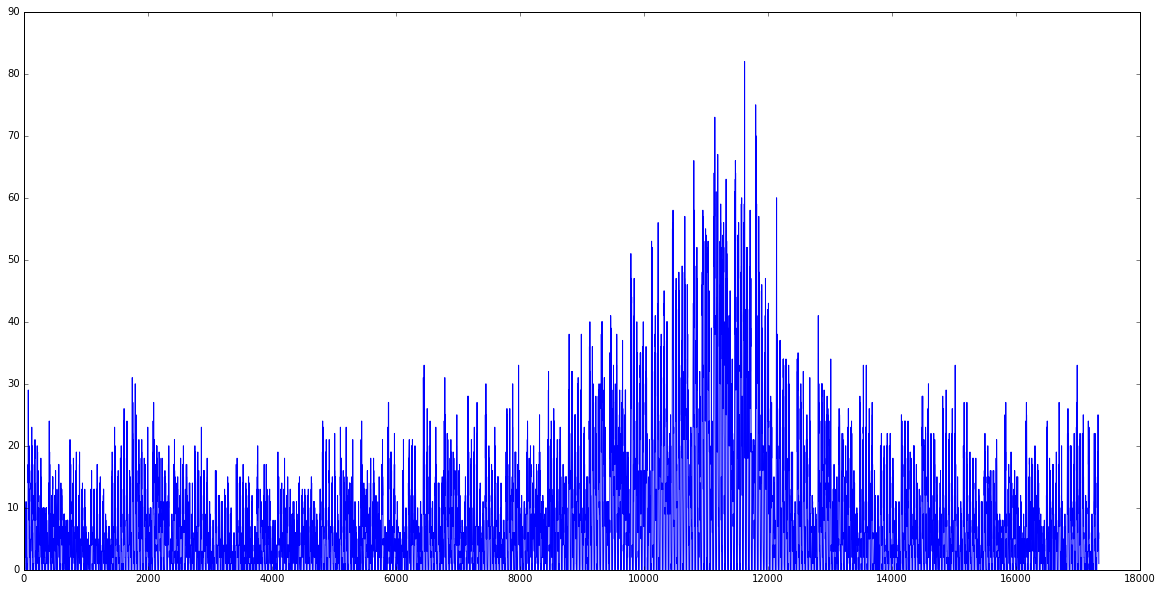

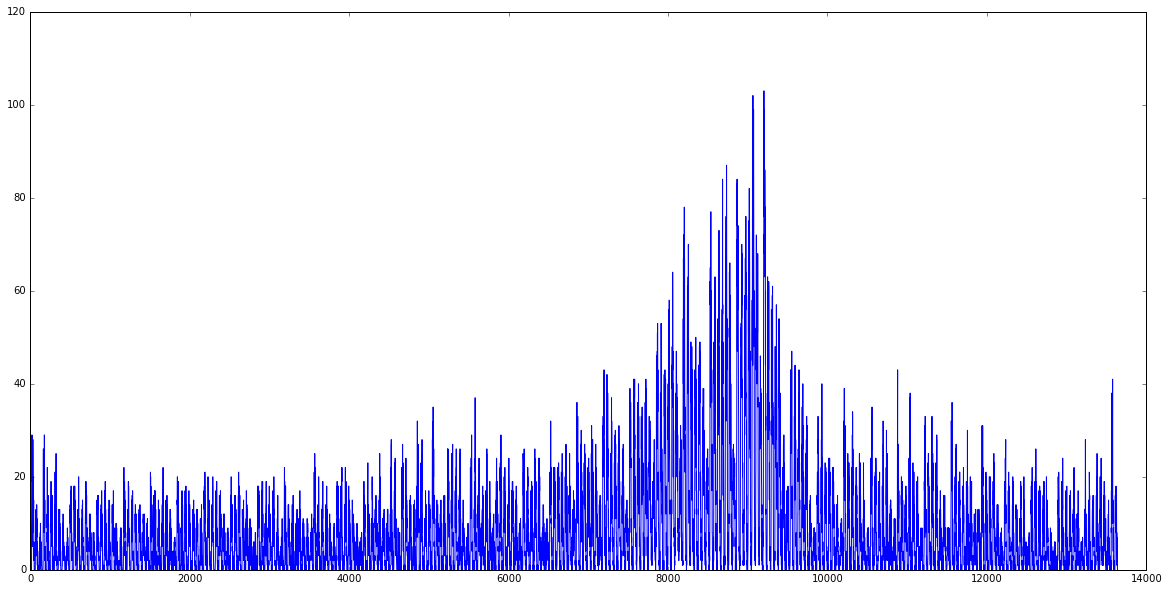

Tech. Total


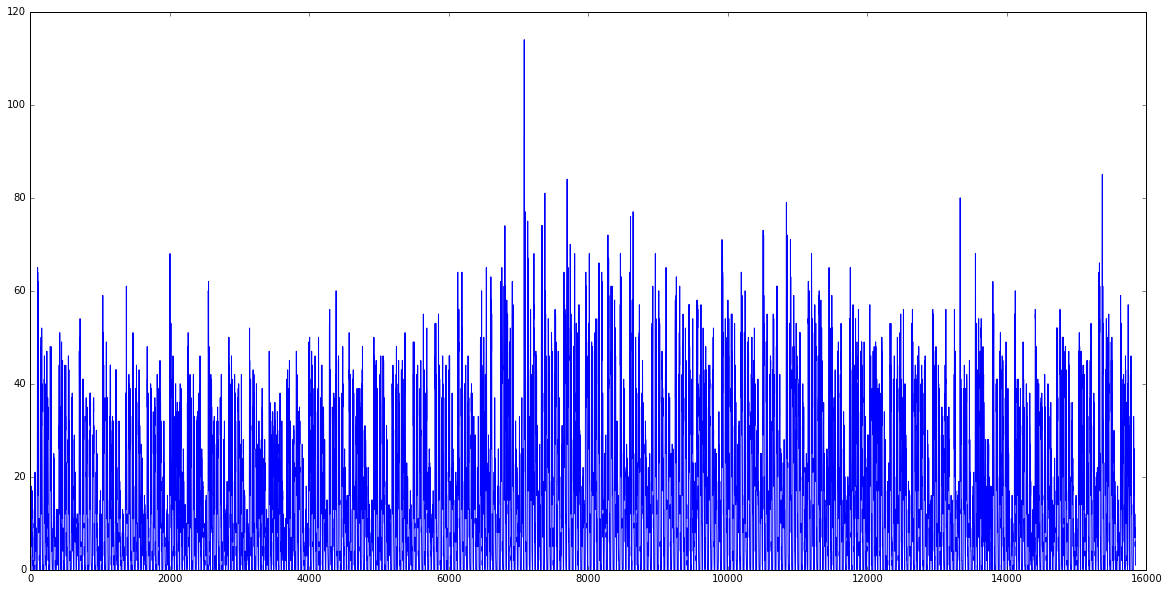

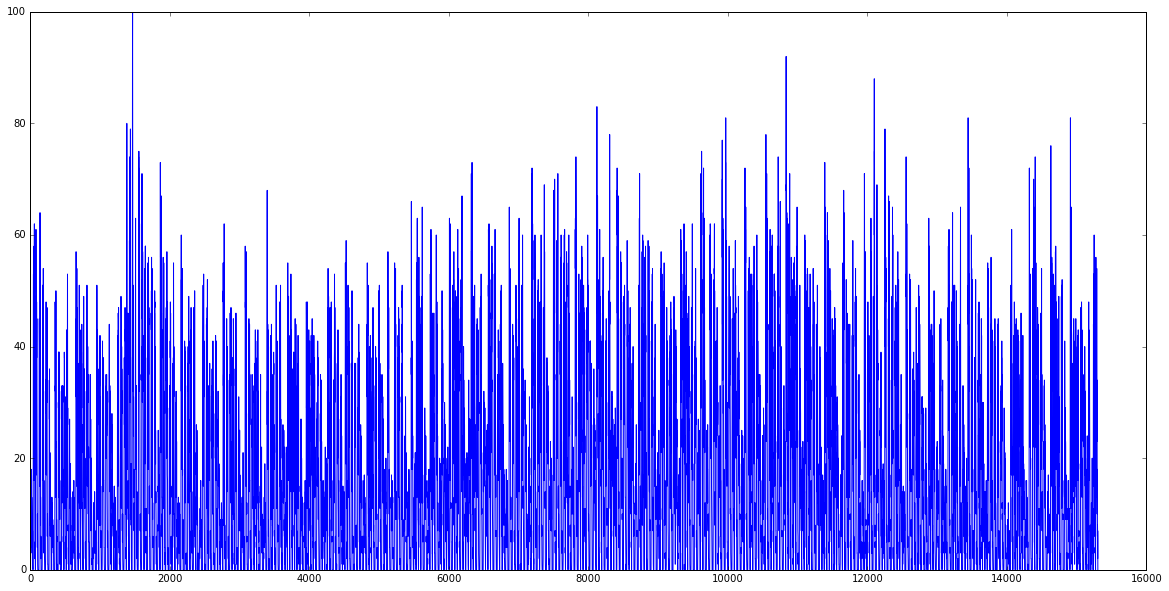

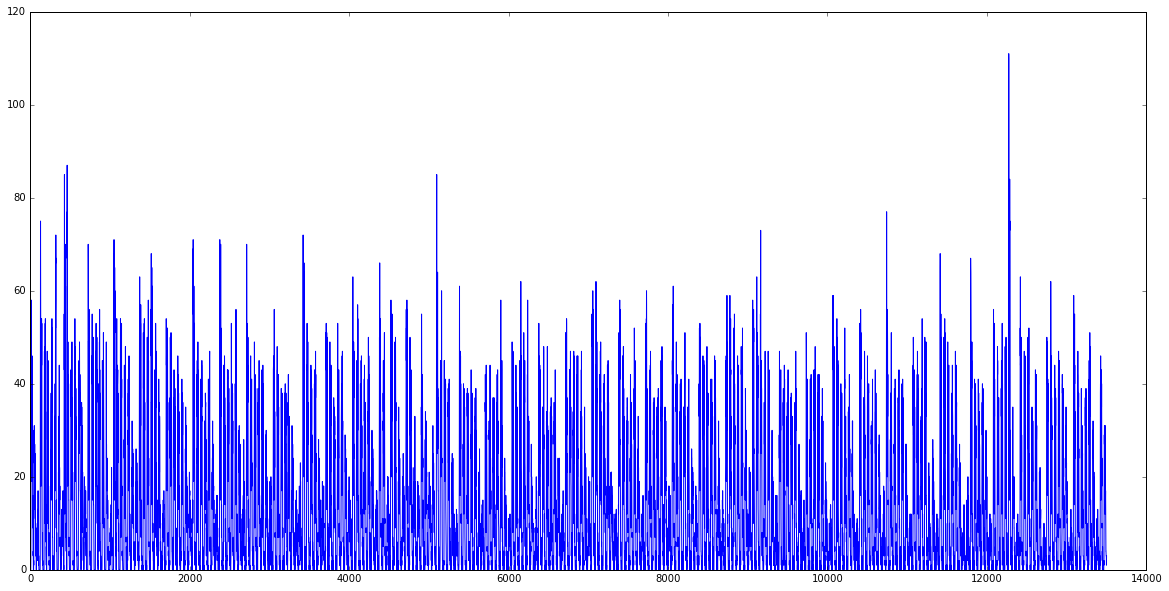

Téléphonie


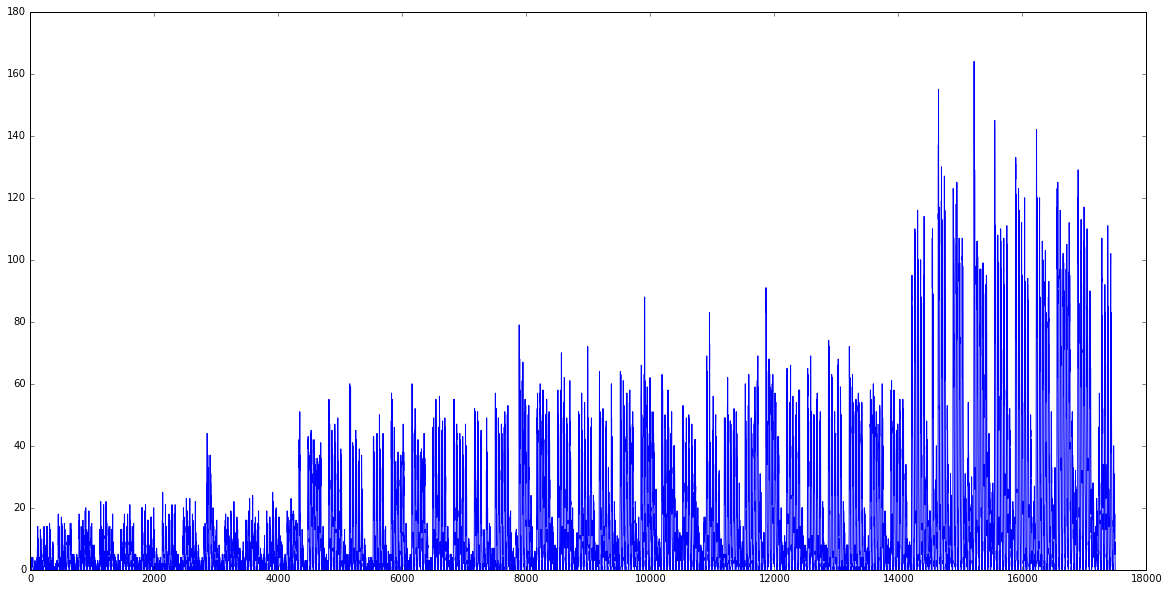

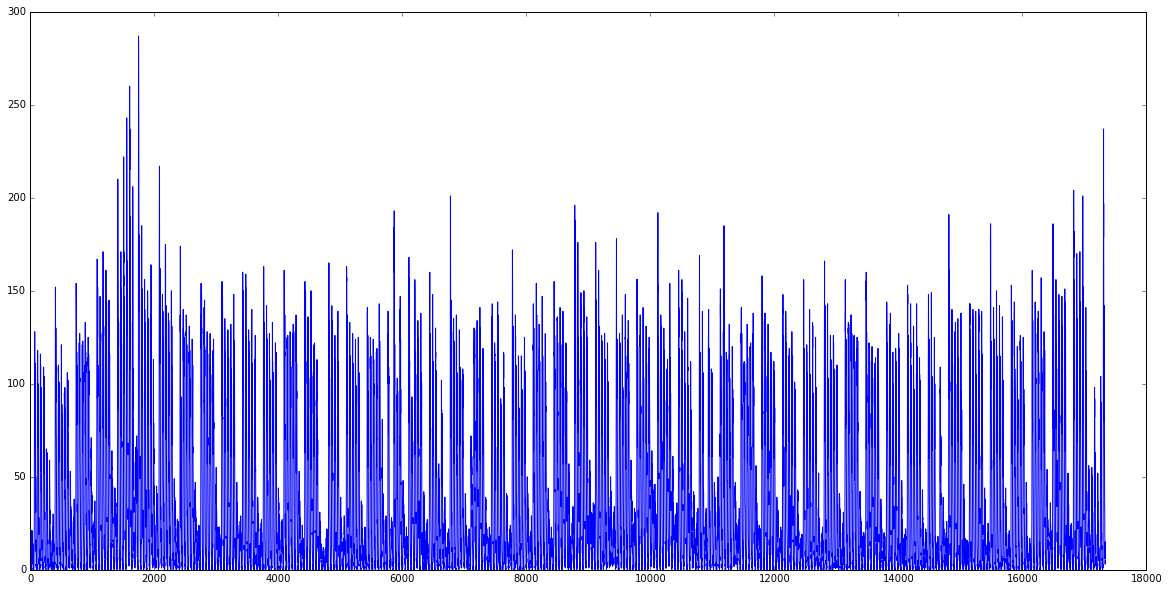

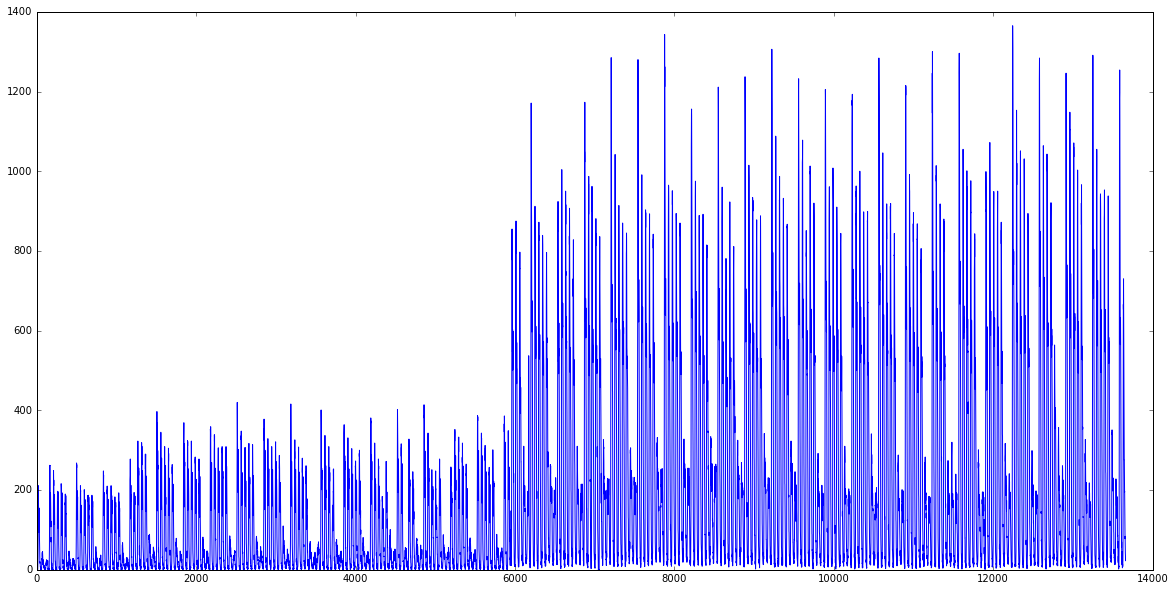

Manager


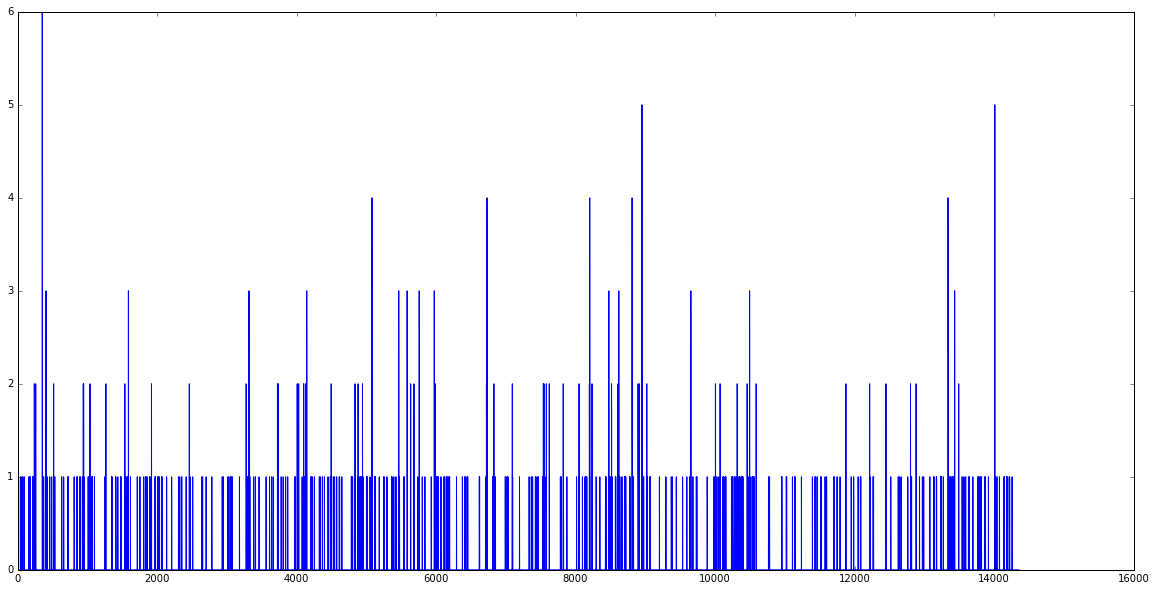

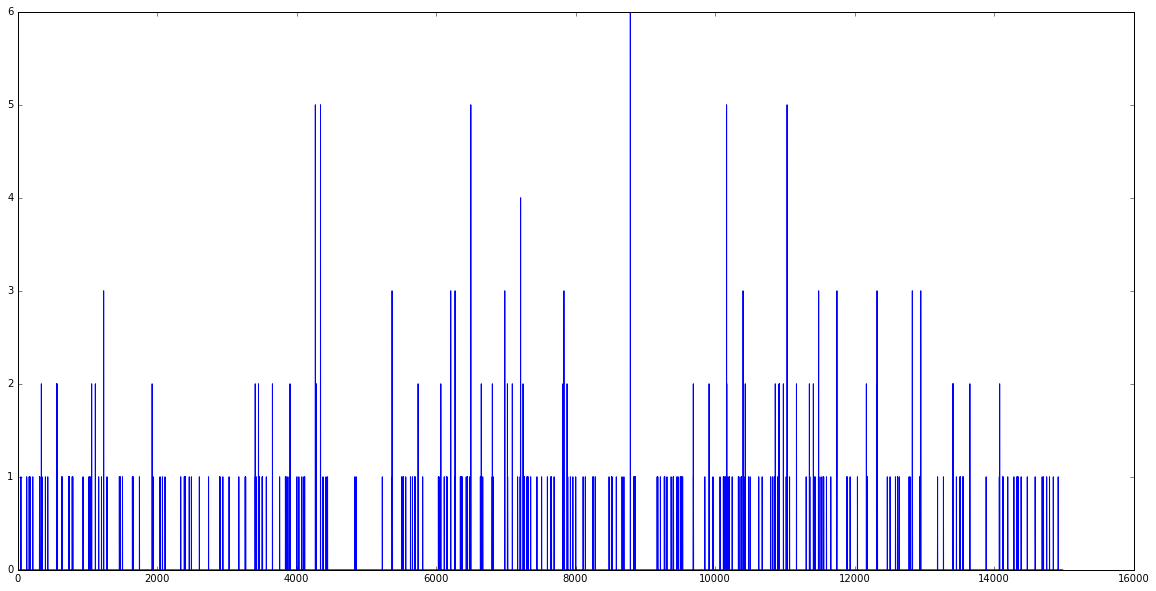

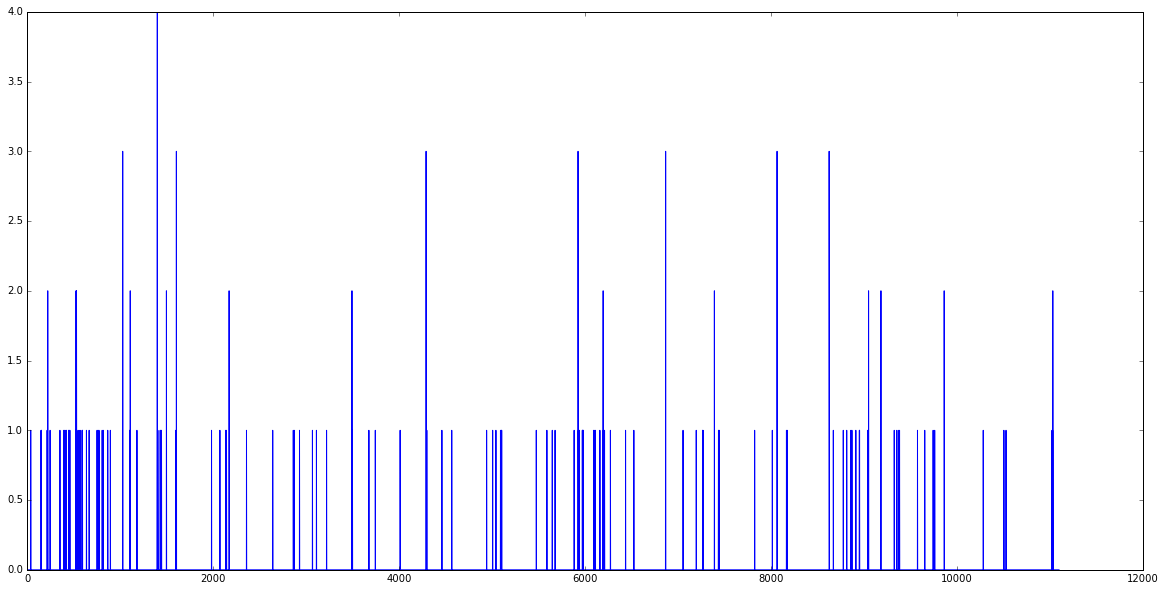

Japon


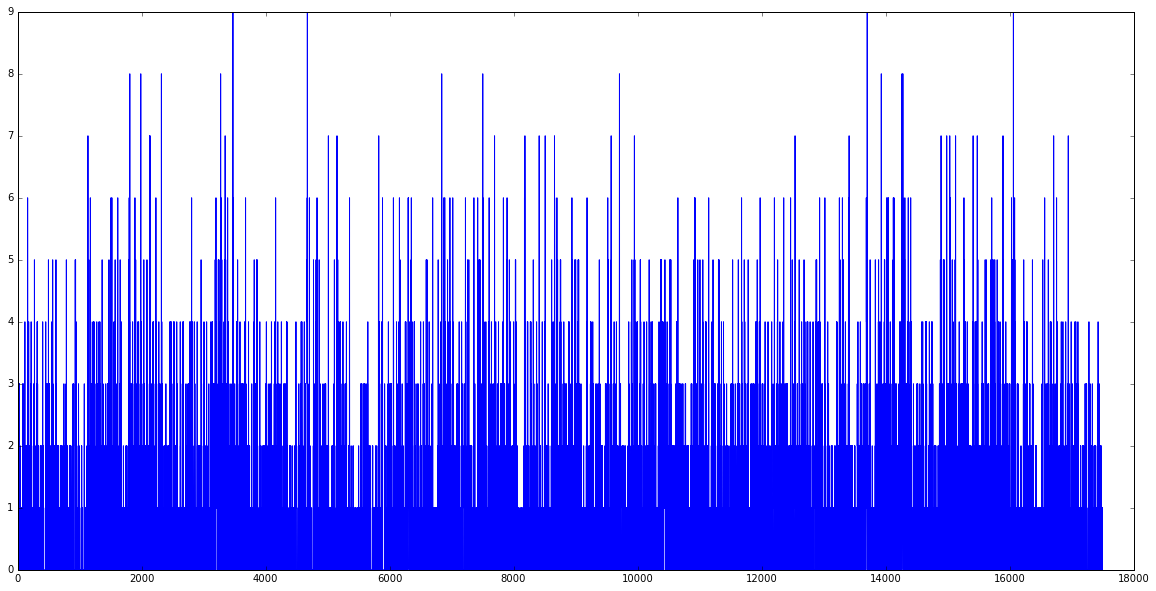

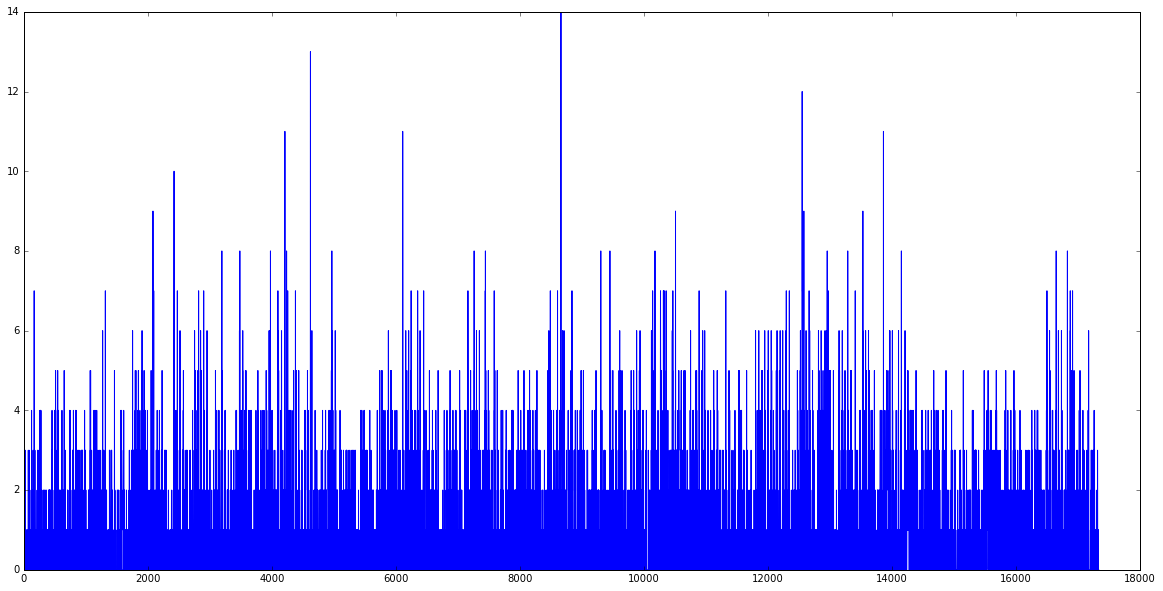

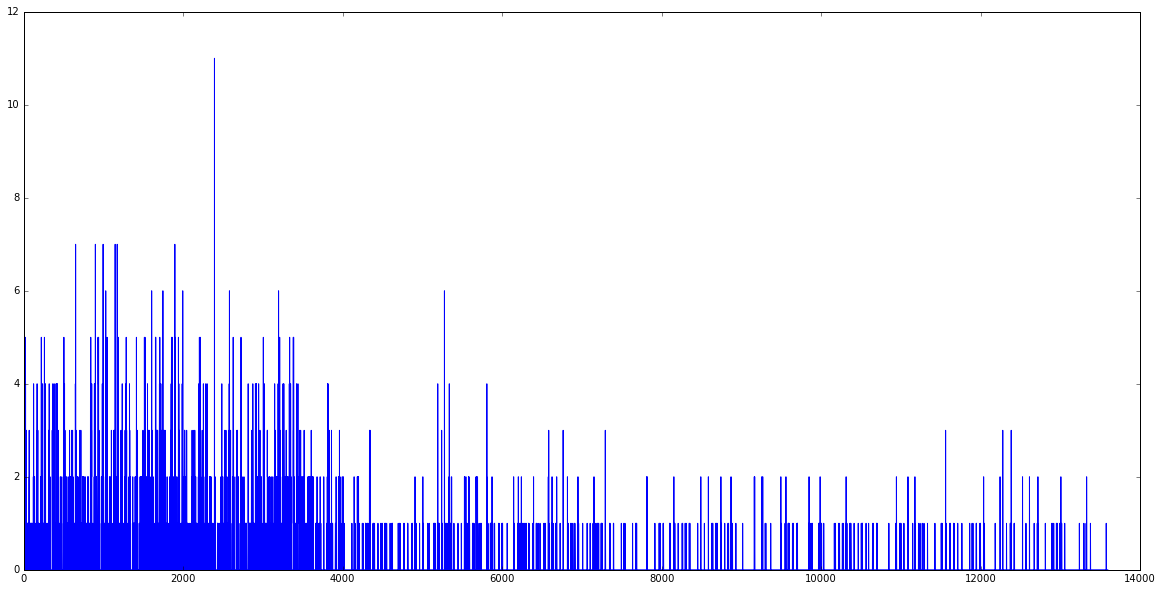

Gestion Relation Clienteles


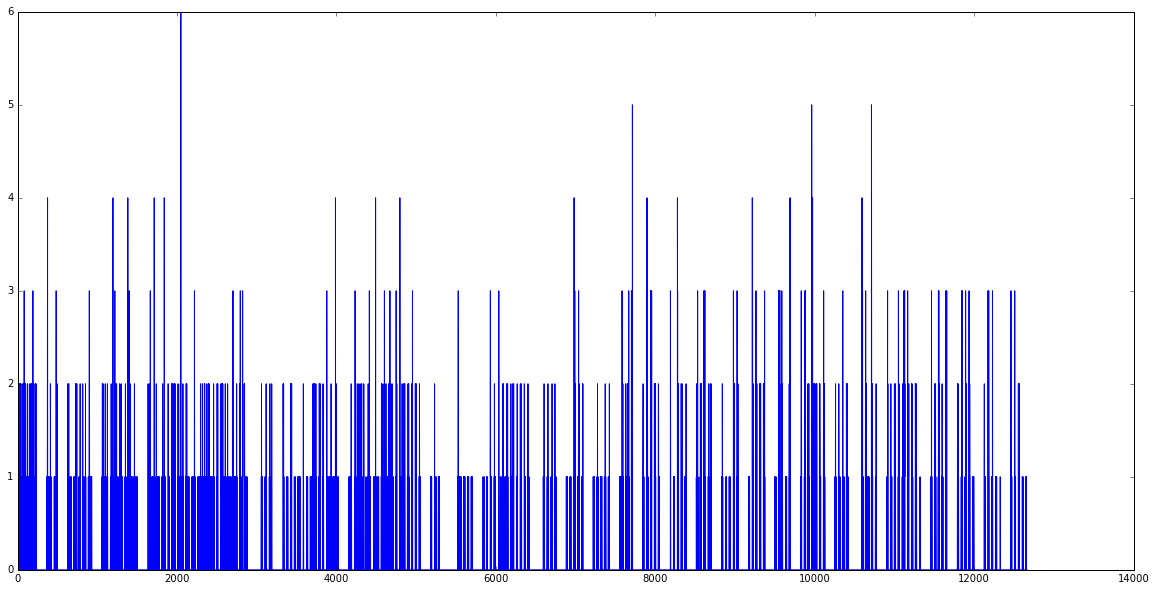

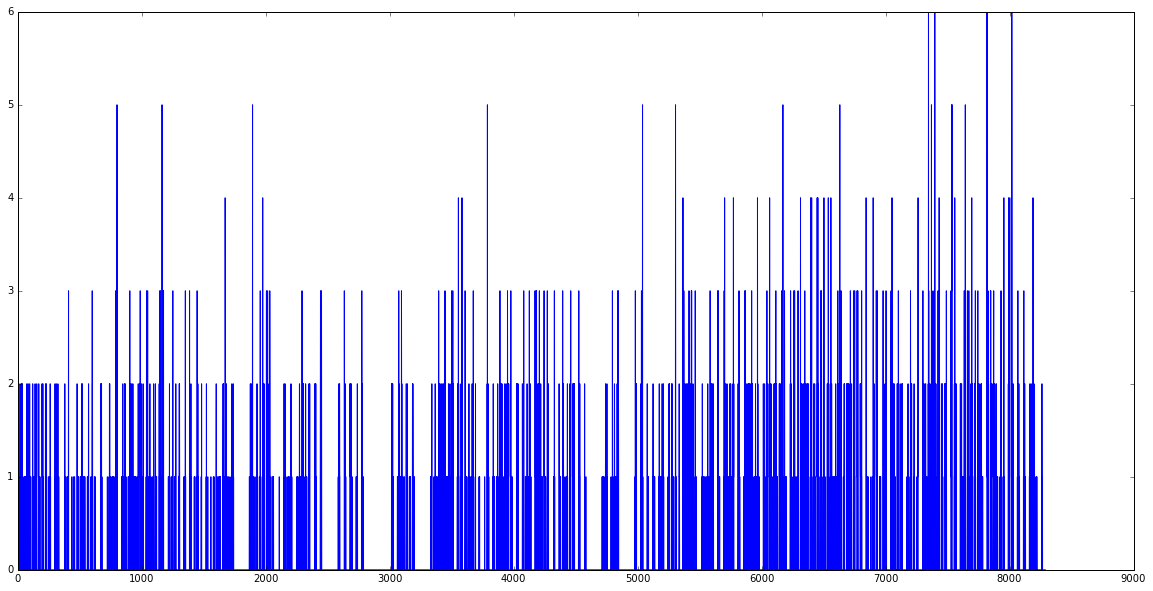

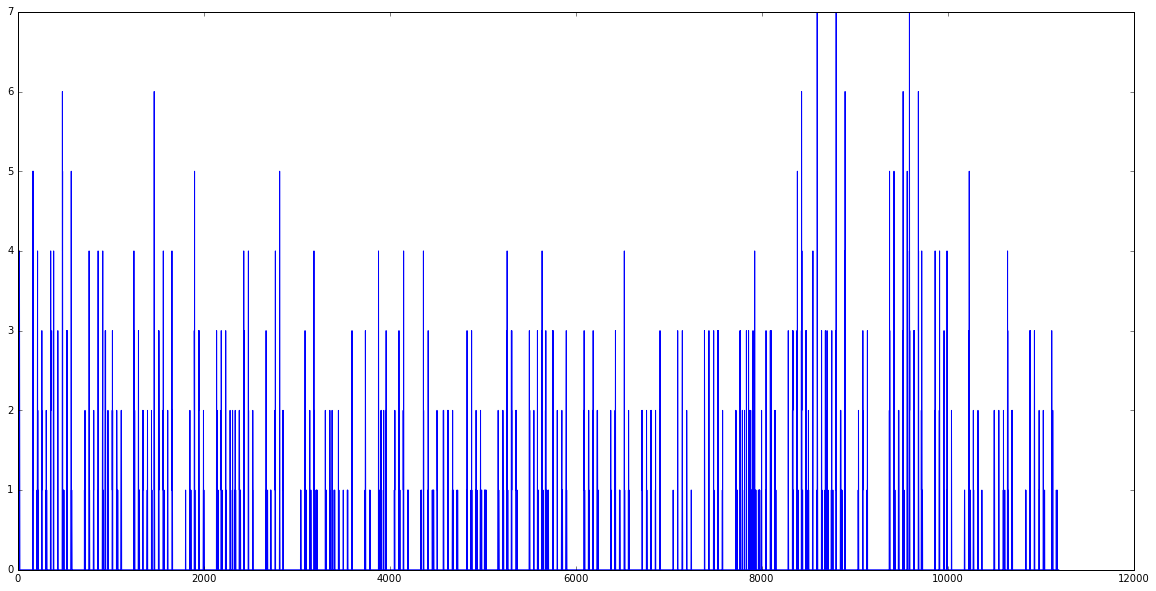

Tech. Axa


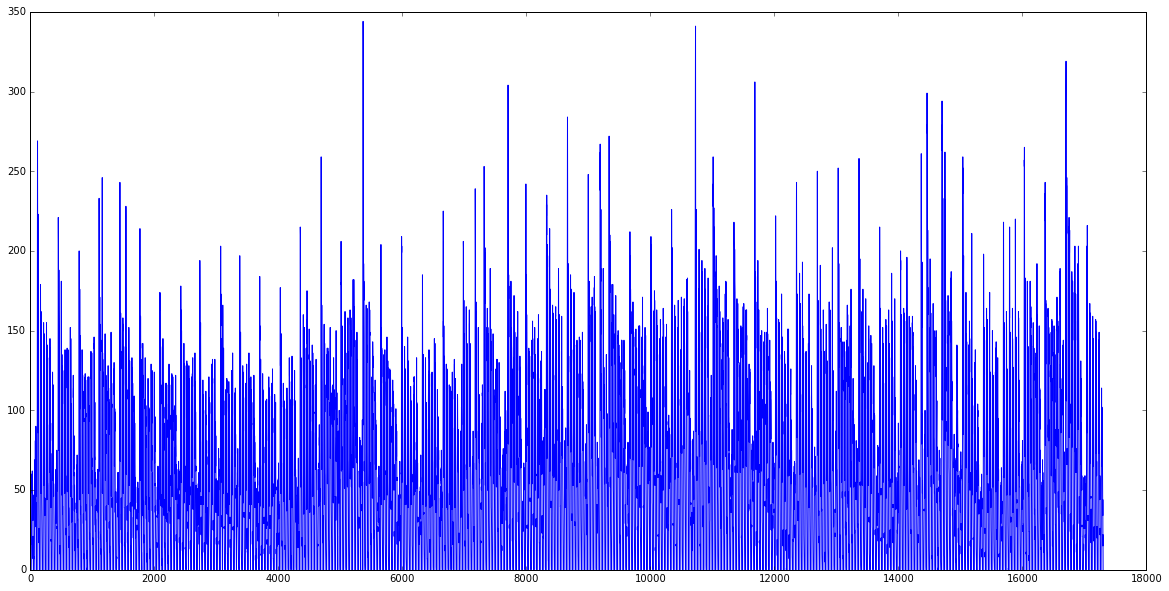

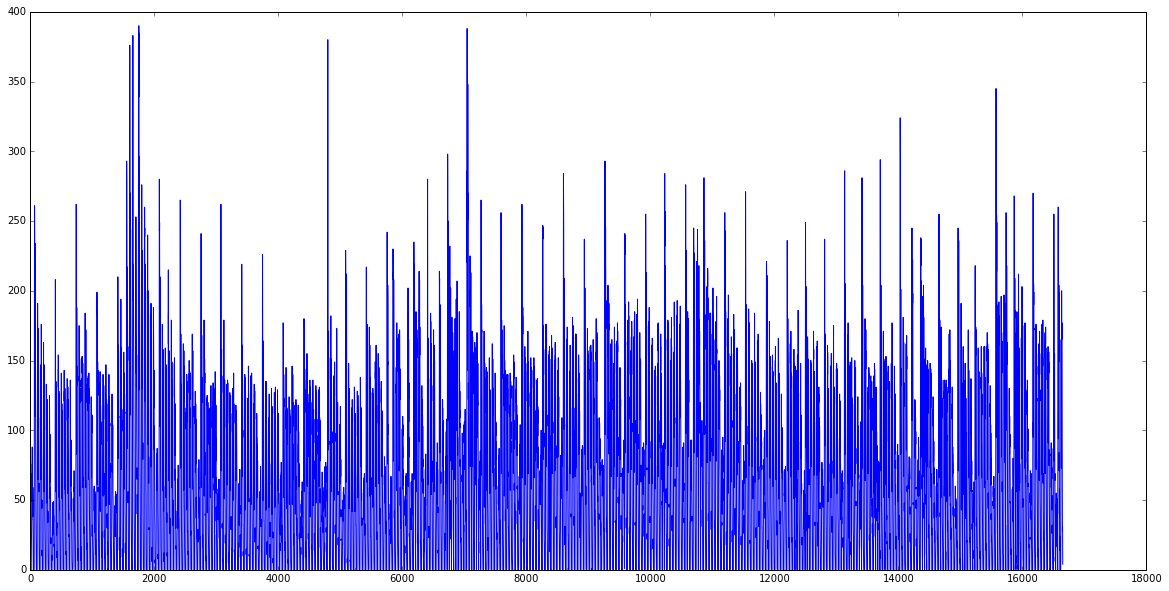

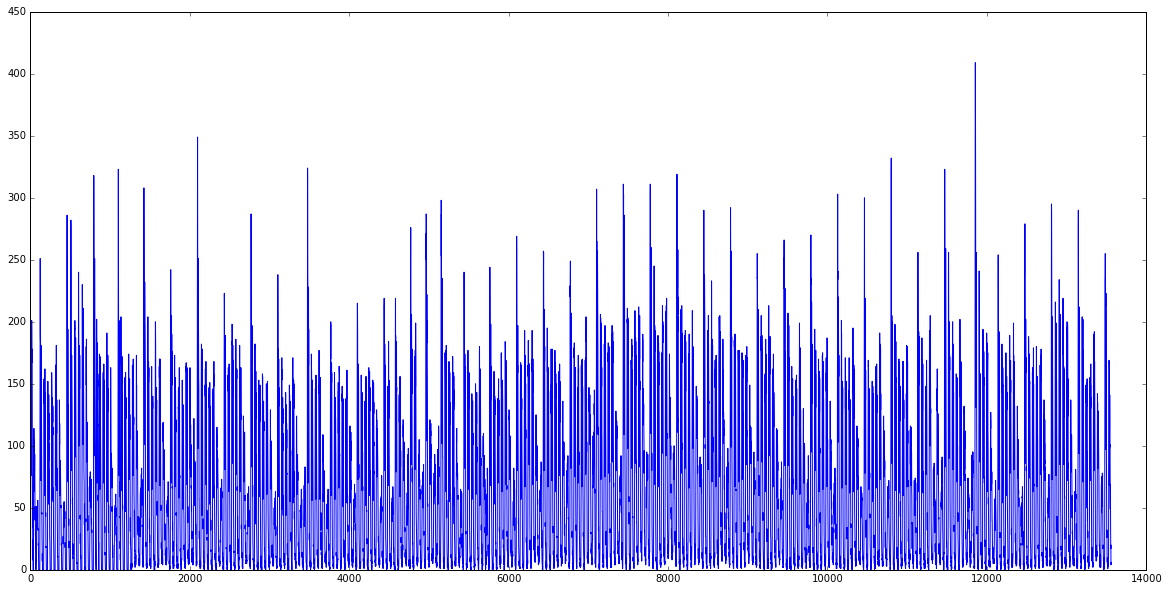

Mécanicien


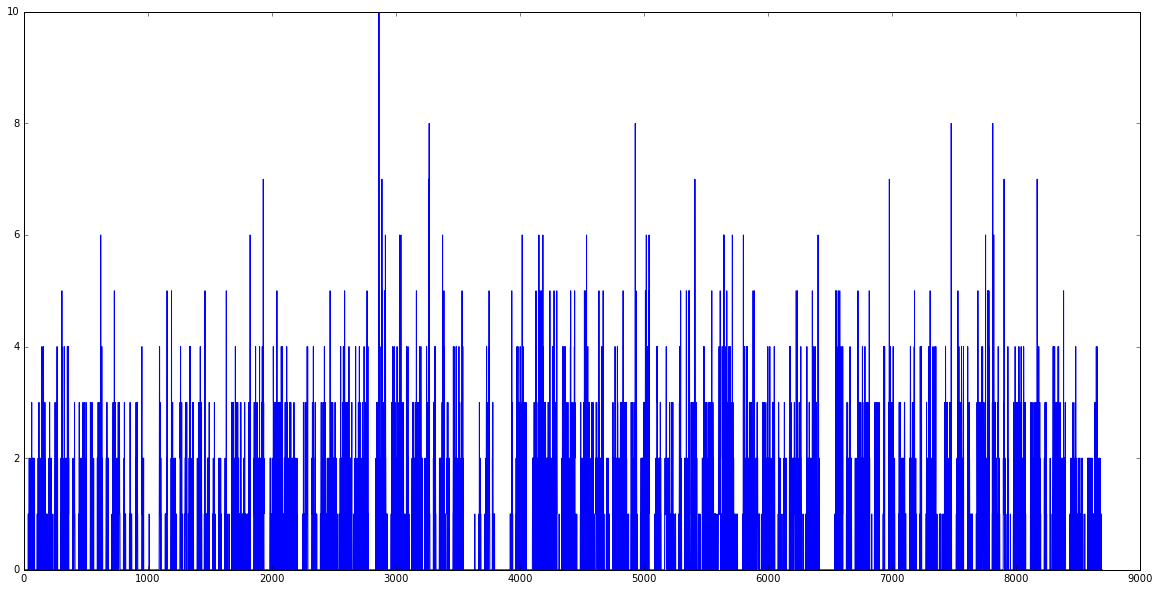

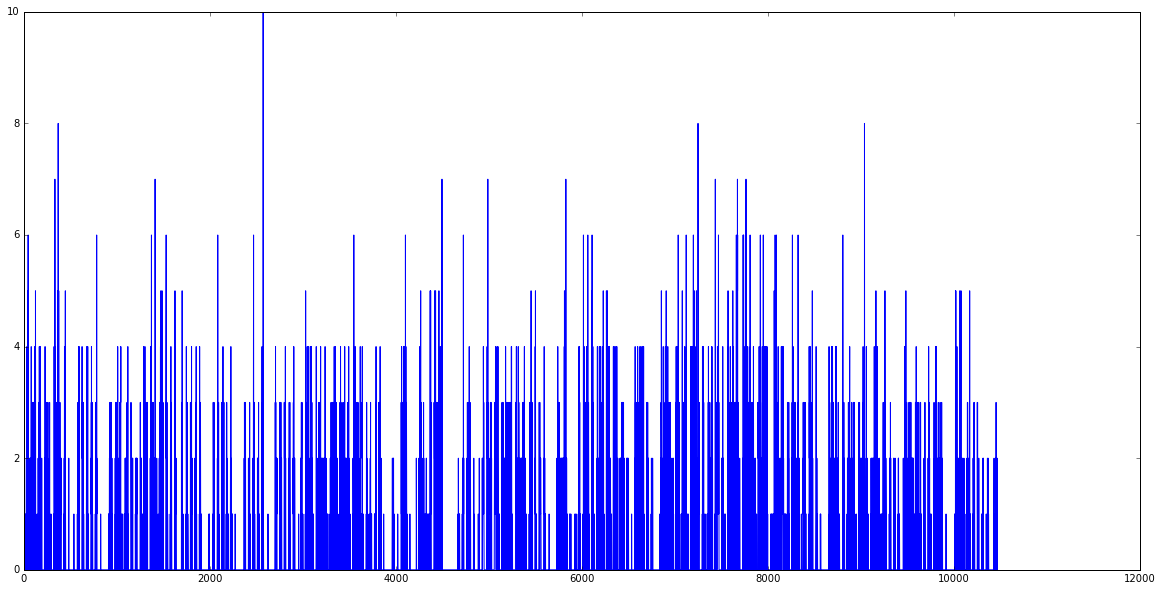

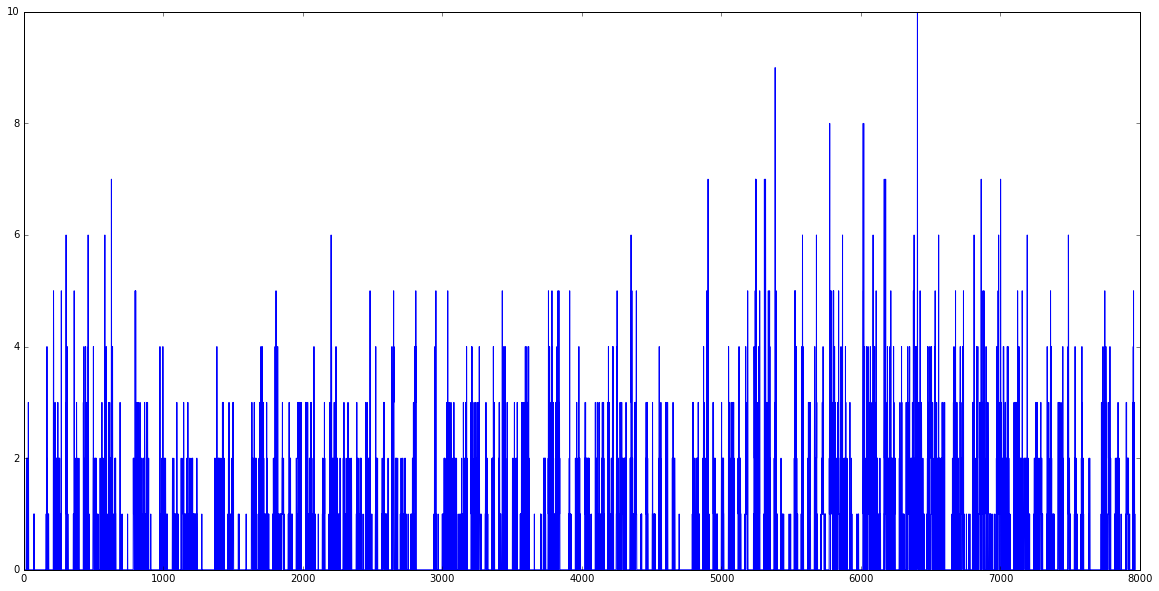

Gestion Assurances


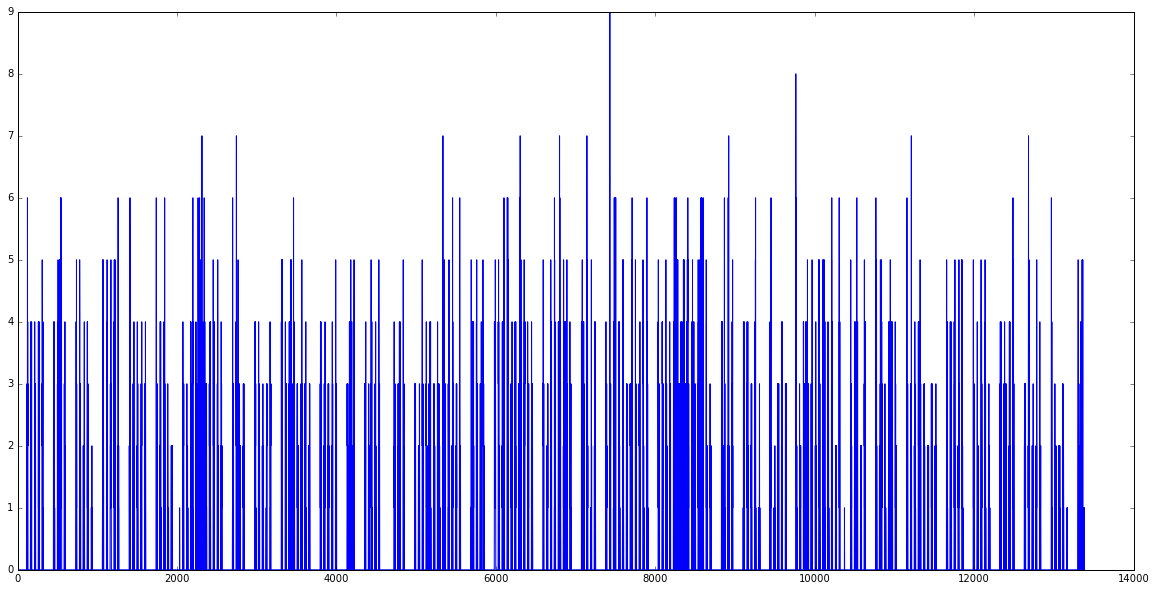

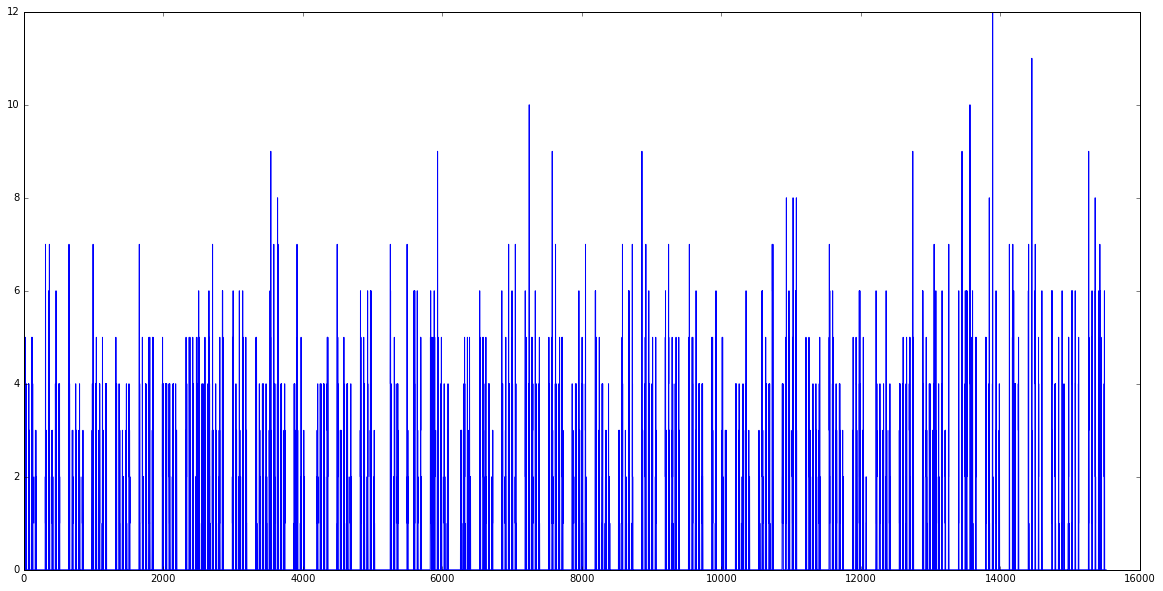

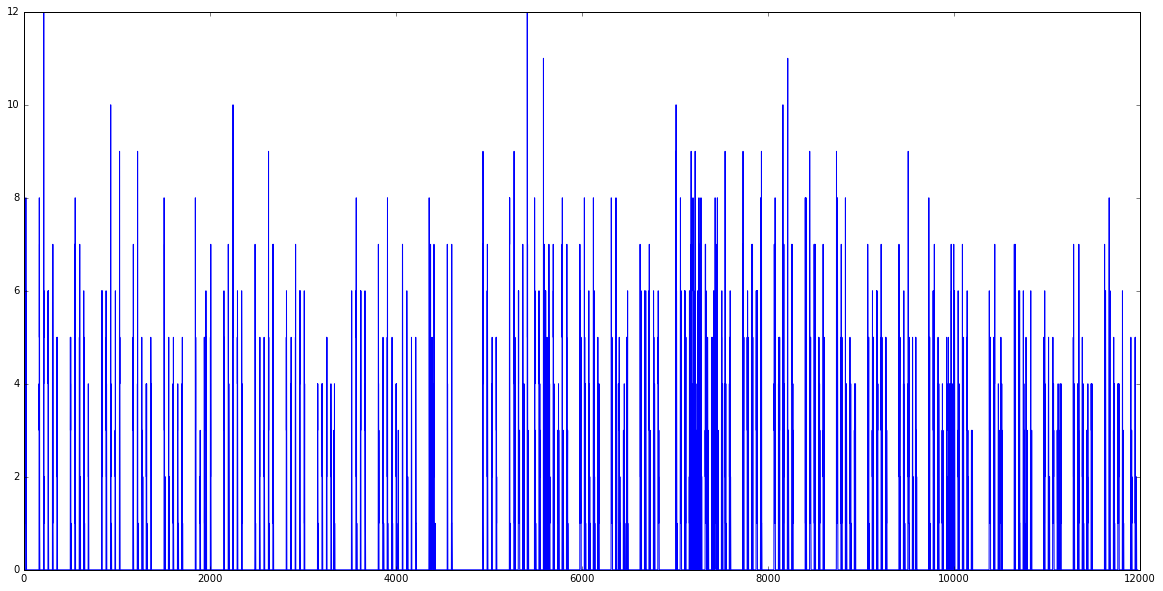

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("train_7.txt",sep='\t')

ass = df.groupby('ASS_ASSIGNMENT')
for gr in ass.groups:
    months = ass.get_group(gr)
    months = months.reset_index()
    year_2011 = months[months.year==2011]
    year_2012 = months[months.year==2012]
    year_2013 = months[months.year==2013]

    print gr
    plt.figure(figsize=(20,10))
    plt.plot(range(len(year_2011)),year_2011['CSPL_RECEIVED_CALLS'].values)
    #plt.title('Each month call number of Telephonie of three years')
    plt.show()

    plt.figure(figsize=(20,10))
    plt.plot(range(len(year_2012)),year_2012['CSPL_RECEIVED_CALLS'].values)
    #plt.title('Each month call number of Telephonie of three years')
    plt.show()

    plt.figure(figsize=(20,10))
    plt.plot(range(len(year_2013)),year_2013['CSPL_RECEIVED_CALLS'].values)
    #plt.title('Each month call number of Telephonie of three years')
    plt.show()